# Analyzing banks customer data and modeling an classifier to predict retention a customer using Artificial Neural Network

In this project we are trying to analyse the customer information of a bank using various analytics techniques such as Exploratory Data analysis, Visualization to come up with hidden insights that could make the bussiness easier and better. In addtion to this, we wil creating a classifier model that would predict whether the customer is going to stay with the bank or not. We are going to use the state of the art Artificial Neural Network for this purpose.

You can learn more about Aritifical Neural Network here:- [Artificial Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network)

### Importing the packages

First, lets us import the necessary packages required for us. We might be importing few more packages as we required down the line.

In [1]:
# Numpy - for vector/matrix computation
import numpy as np

# Matplotlib - for visualization
import matplotlib.pyplot as plt

# Seaborn - for visualization
import seaborn as sns

# Pandas - data manipulation
import pandas as pd

## Importing the dataset

Now that we have most often used packages onboard, we can go ahead and import the dataset into the notebook by using the pandas libary functions. This gives a dataframe variable. And we will view the first 6 elements of the dataframe.

In [2]:
customer_data = pd.read_csv('bank_customers.csv')
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


There are 14 feautures in the dataset. Lets see the structure of the dataframe.

In [3]:
dimension = customer_data.shape
print("There are", dimension[0], "rows.")
print("There are", dimension[1], "columns.")

There are 10000 rows.
There are 14 columns.


## Exploratory Data Analysis

We are going to analysis the data using combination of statistical methods and visualization to find any descriptive and hidden insights out of the data. First let see distributuion of Geography and Gender variables.

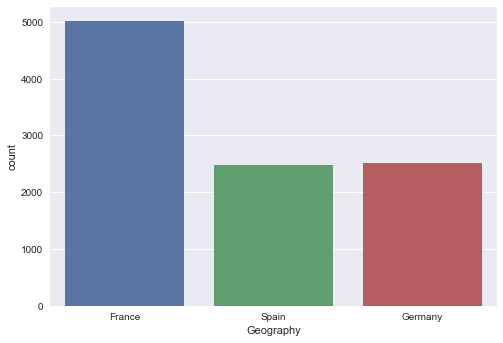

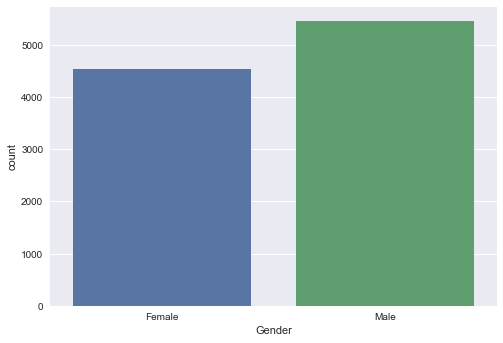

In [4]:
# Setting style for seaborn plots to dark colors
sns.set(style="darkgrid")

# Calling the seaborn coutplots

# Geography
sns.countplot(x = "Geography", data = customer_data)
sns.plt.show()

# Gender
sns.countplot(x = "Gender", data = customer_data)
sns.plt.show()

So the above two plots shows the counts of people in each category of Geography and Gender in the customer group. for the visualizations, we can see that the bank is having high number of customers in France and also the numbers doubles what they have in Spain and Germany. Moving on to the Gender, Male customers are nearly 1000 numbers higher than Female customers. Next we will see the distribution of credit score and age of the customers using histograms.

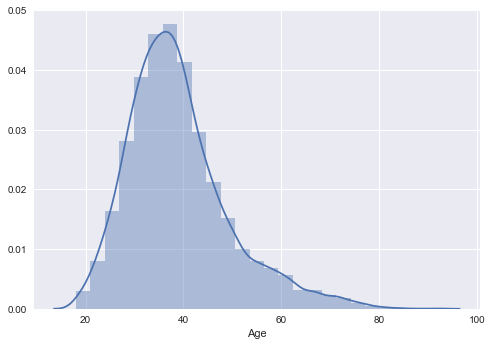

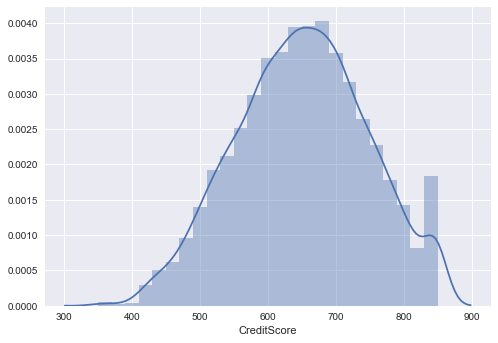

In [5]:
# Calling the histograms os seaborn

# Age
sns.distplot(customer_data["Age"], bins = 25)
sns.plt.show()

# Credit Score
sns.distplot(customer_data["CreditScore"], bins = 25)
sns.plt.show()

From the visualization, we can understand that the bank has most of their customers in the age group are around the age of 30 to 40. Thus the histogram or the distribution of the customer's age is slightly positively queued. Meanwhile when we are looking at the credit score it is evident that the most of the customer are having stable credit score. Thus just to confirm that most of the customers are wealthy/stable people we have to see the summary statistics of the customer's balance.

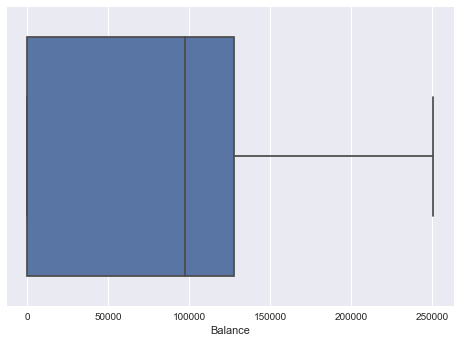

In [6]:
# Boxplot of Balance 
sns.boxplot(x = customer_data["Balance"])
sns.plt.show()

This is interesting !! Almost 75th percentaile of the customers are within 121k balance. Most importantly, it is clear there are more than 25% people who are having zero balance. That is not so good for the bank. We can say that there is not much relation between credit score and balance. But is there a relationship between the age, credit score, balance, and extimated salary. So we will subset those and plot in a pairwise plot

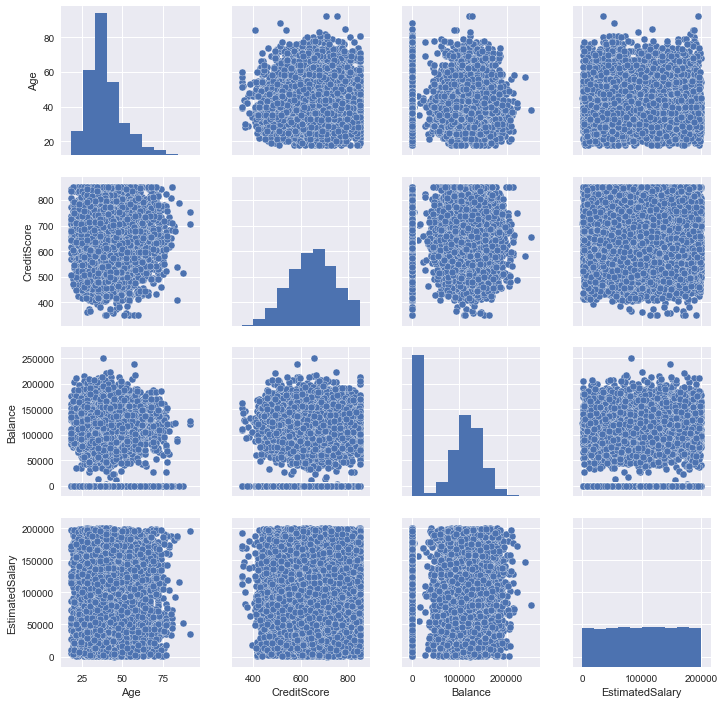

In [7]:
# Subset the specific column for the pairwise plot
sns.pairplot(customer_data.loc[:, ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']])
sns.plt.show()

From the above pairwise plot, we can not evidently show that there is not much relationship between any of these variables. So we cannot do much of feauture reduction just by seeing the correlation. So we will just try to use Artficial Neural Networks to solve this classification problem.

## Modeling the Excited Classifier

Now that we have pretty much explored the data, we can go ahead and create the classifier model for Excited variable using Artificial Neural Networks. In order to make the ANN work properly, there are few data processing that we need to do. First let us create the dependant and independant variables out of the dataset.

In [8]:
# Splitting the dataset into Dependant and independant varibles
X = customer_data.iloc[:, 3:13].values
y = customer_data.iloc[:, 13].values

So X is our dependant variable and Y is our independant variable. Since the ANN works on the vectors, we need to encode the categorical variable by creating dummy variables for each of the levels in the categorical variable. So lets go ahead.

In [9]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

Always when we are modeling we need to split out dataset into test and train set and that is what we are going to do now. We are sckit-learn package train_test_split() for this purpose.

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Just like train and test set for modelling purpose, ANN or any Nerual Nets the inputs are always scaled preferably from 0 to 1. Feauture scaling reduces the computation time. Thus we are going to scale the independant variable for this.

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we are all set for the training the model, we are train a ANN and also going to tune it using Grid Search cross validation methodology. Grid Search retuns the best parameters that we can use along with the best accuracy which we are getting with the best parameters. Here we are going to single hidden layer with 6 neurons units with recitifier activation unit. The output being only two classes, we can just use the 'binary cross entropy'. In the grid search, the parameters we are going to check are batch size, epochs, and optimizer. Lets get start with it. It might take time depending upon your machines computation time.

In [12]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# Classifier buliding
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)

parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)

# Fitting the neural nets with grid search
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Using TensorFlow backend.


Epoch 1/100
7200/7200 [==============================] - 0s - loss: 0.5537 - acc: 0.7965     
Epoch 2/100
7200/7200 [==============================] - 0s - loss: 0.4335 - acc: 0.7971     
Epoch 3/100
7200/7200 [==============================] - 0s - loss: 0.4278 - acc: 0.7971     
Epoch 4/100
7200/7200 [==============================] - 0s - loss: 0.4243 - acc: 0.7971     
Epoch 5/100
7200/7200 [==============================] - 0s - loss: 0.4212 - acc: 0.7971     
Epoch 6/100
7200/7200 [==============================] - 0s - loss: 0.4191 - acc: 0.8043     
Epoch 7/100
7200/7200 [==============================] - 0s - loss: 0.4176 - acc: 0.8225     
Epoch 8/100
7200/7200 [==============================] - 0s - loss: 0.4162 - acc: 0.8251     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0.4153 - acc: 0.8246     
Epoch 10/100
7200/7200 [==============================] - 0s - loss: 0.4146 - acc: 0.8275     
Epoch 11/100
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s - loss: 0.3998 - acc: 0.8357     
Epoch 73/100
7200/7200 [==============================] - 0s - loss: 0.4003 - acc: 0.8353     
Epoch 74/100
7200/7200 [==============================] - 0s - loss: 0.4003 - acc: 0.8362     - ETA: 0s - loss: 0.3906
Epoch 75/100
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8356     
Epoch 76/100
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8357     
Epoch 77/100
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8344     
Epoch 78/100
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8361     
Epoch 79/100
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8351     
Epoch 80/100
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8356     
Epoch 81/100
7200/7200 [==============================] - 0s - loss: 0.4003 - acc: 0.8356     
Epoch 82/100
7200/7200 [===============

7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8356     
Epoch 43/100
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8361     
Epoch 44/100
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8361     
Epoch 45/100
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8354     
Epoch 46/100
7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8353     
Epoch 47/100
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8351     
Epoch 48/100
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8360     
Epoch 49/100
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8351     
Epoch 50/100
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8346     
Epoch 51/100
7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8361     
Epoch 52/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4145 - acc: 0.8275     
Epoch 13/100
7200/7200 [==============================] - 0s - loss: 0.4132 - acc: 0.8294     
Epoch 14/100
7200/7200 [==============================] - 0s - loss: 0.4126 - acc: 0.8310     
Epoch 15/100
7200/7200 [==============================] - 0s - loss: 0.4115 - acc: 0.8306     
Epoch 16/100
7200/7200 [==============================] - 0s - loss: 0.4112 - acc: 0.8322     
Epoch 17/100
7200/7200 [==============================] - 0s - loss: 0.4104 - acc: 0.8324     
Epoch 18/100
7200/7200 [==============================] - 0s - loss: 0.4098 - acc: 0.8343     
Epoch 19/100
7200/7200 [==============================] - 0s - loss: 0.4091 - acc: 0.8331     
Epoch 20/100
7200/7200 [==============================] - 0s - loss: 0.4088 - acc: 0.8347     
Epoch 21/100
7200/7200 [==============================] - 0s - loss: 0.4084 - acc: 0.8357     
Epoch 22/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3364 - acc: 0.8624     
Epoch 84/100
7200/7200 [==============================] - 0s - loss: 0.3367 - acc: 0.8635     
Epoch 85/100
7200/7200 [==============================] - 0s - loss: 0.3366 - acc: 0.8629     
Epoch 86/100
7200/7200 [==============================] - 0s - loss: 0.3367 - acc: 0.8633     
Epoch 87/100
7200/7200 [==============================] - 0s - loss: 0.3368 - acc: 0.8632     
Epoch 88/100
7200/7200 [==============================] - 0s - loss: 0.3363 - acc: 0.8632     
Epoch 89/100
7200/7200 [==============================] - 0s - loss: 0.3359 - acc: 0.8632     
Epoch 90/100
7200/7200 [==============================] - 0s - loss: 0.3367 - acc: 0.8632     
Epoch 91/100
7200/7200 [==============================] - 0s - loss: 0.3365 - acc: 0.8633     
Epoch 92/100
7200/7200 [==============================] - 0s - loss: 0.3362 - acc: 0.8618     
Epoch 93/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8378     
Epoch 54/100
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8381     
Epoch 55/100
7200/7200 [==============================] - 0s - loss: 0.3917 - acc: 0.8376     - ETA: 0s - loss: 0.4435 - ac
Epoch 56/100
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8386     
Epoch 57/100
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8378     
Epoch 58/100
7200/7200 [==============================] - 0s - loss: 0.3916 - acc: 0.8393     
Epoch 59/100
7200/7200 [==============================] - 0s - loss: 0.3916 - acc: 0.8374     
Epoch 60/100
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8364     
Epoch 61/100
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8385     
Epoch 62/100
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8390     
Epoch 63/100
7200/7200 [==========

7200/7200 [==============================] - 0s - loss: 0.3595 - acc: 0.8537     
Epoch 23/100
7200/7200 [==============================] - 0s - loss: 0.3589 - acc: 0.8535     
Epoch 24/100
7200/7200 [==============================] - 0s - loss: 0.3580 - acc: 0.8558     
Epoch 25/100
7200/7200 [==============================] - 0s - loss: 0.3570 - acc: 0.8540     
Epoch 26/100
7200/7200 [==============================] - 0s - loss: 0.3561 - acc: 0.8564     
Epoch 27/100
7200/7200 [==============================] - 0s - loss: 0.3560 - acc: 0.8551     
Epoch 28/100
7200/7200 [==============================] - 0s - loss: 0.3554 - acc: 0.8560     
Epoch 29/100
7200/7200 [==============================] - 0s - loss: 0.3555 - acc: 0.8567     
Epoch 30/100
7200/7200 [==============================] - 0s - loss: 0.3541 - acc: 0.8554     
Epoch 31/100
7200/7200 [==============================] - 0s - loss: 0.3538 - acc: 0.8561     
Epoch 32/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3367 - acc: 0.8621     
Epoch 94/100
7200/7200 [==============================] - 0s - loss: 0.3371 - acc: 0.8592     
Epoch 95/100
7200/7200 [==============================] - 0s - loss: 0.3362 - acc: 0.8612     
Epoch 96/100
7200/7200 [==============================] - 0s - loss: 0.3360 - acc: 0.8624     
Epoch 97/100
7200/7200 [==============================] - 0s - loss: 0.3362 - acc: 0.8601     
Epoch 98/100
7200/7200 [==============================] - 0s - loss: 0.3362 - acc: 0.8636     
Epoch 99/100
7200/7200 [==============================] - 0s - loss: 0.3363 - acc: 0.8614     
Epoch 100/100
7200/7200 [==============================] - 0s - loss: 0.5586 - acc: 0.7946     
Epoch 2/100
7200/7200 [==============================] - 0s - loss: 0.4387 - acc: 0.7956     
Epoch 3/100
7200/7200 [==============================] - 0s - loss: 0.4307 - acc: 0.7956     
Epoch 4/100
7200/7200 [==============================] - 0s - lo

7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8369     
Epoch 64/100
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8386     
Epoch 65/100
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8393     
Epoch 66/100
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8376     
Epoch 67/100
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8387     
Epoch 68/100
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8378     
Epoch 69/100
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8392     
Epoch 70/100
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8393     
Epoch 71/100
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8394     
Epoch 72/100
7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8364     
Epoch 73/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4034 - acc: 0.8339     
Epoch 34/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8346     
Epoch 35/100
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8356     
Epoch 36/100
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8343     
Epoch 37/100
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8361     
Epoch 38/100
7200/7200 [==============================] - 0s - loss: 0.4003 - acc: 0.8342     
Epoch 39/100
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8353     
Epoch 40/100
7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8364     
Epoch 41/100
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8353     
Epoch 42/100
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8360     
Epoch 43/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4358 - acc: 0.7963     
Epoch 4/100
7200/7200 [==============================] - 0s - loss: 0.4305 - acc: 0.7963     
Epoch 5/100
7200/7200 [==============================] - 0s - loss: 0.4272 - acc: 0.7963     
Epoch 6/100
7200/7200 [==============================] - 0s - loss: 0.4246 - acc: 0.7962     
Epoch 7/100
7200/7200 [==============================] - 0s - loss: 0.4218 - acc: 0.7962     
Epoch 8/100
7200/7200 [==============================] - 0s - loss: 0.4190 - acc: 0.7963     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0.4166 - acc: 0.8131     
Epoch 10/100
7200/7200 [==============================] - 0s - loss: 0.4153 - acc: 0.8257     
Epoch 11/100
7200/7200 [==============================] - 0s - loss: 0.4138 - acc: 0.8283     
Epoch 12/100
7200/7200 [==============================] - 0s - loss: 0.4126 - acc: 0.8306     
Epoch 13/100
7200/7200 [==============================] - 0s - loss: 

7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8389     
Epoch 75/100
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8400     
Epoch 76/100
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8382     
Epoch 77/100
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8397     
Epoch 78/100
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8382     
Epoch 79/100
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8381     
Epoch 80/100
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8390     
Epoch 81/100
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8392     
Epoch 82/100
7200/7200 [==============================] - 0s - loss: 0.3903 - acc: 0.8396     
Epoch 83/100
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8399     
Epoch 84/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4028 - acc: 0.8361     
Epoch 45/500
7200/7200 [==============================] - 0s - loss: 0.4026 - acc: 0.8337     
Epoch 46/500
7200/7200 [==============================] - 0s - loss: 0.4023 - acc: 0.8346     
Epoch 47/500
7200/7200 [==============================] - 0s - loss: 0.4021 - acc: 0.8344     
Epoch 48/500
7200/7200 [==============================] - 0s - loss: 0.4023 - acc: 0.8336     
Epoch 49/500
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8347     
Epoch 50/500
7200/7200 [==============================] - 0s - loss: 0.4021 - acc: 0.8354     
Epoch 51/500
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8356     
Epoch 52/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8346     
Epoch 53/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8358     
Epoch 54/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8351     
Epoch 131/500
7200/7200 [==============================] - 0s - loss: 0.3995 - acc: 0.8344     
Epoch 132/500
7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8340     
Epoch 133/500
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8351     
Epoch 134/500
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8349     
Epoch 135/500
7200/7200 [==============================] - 0s - loss: 0.3998 - acc: 0.8349     
Epoch 136/500
7200/7200 [==============================] - 0s - loss: 0.3996 - acc: 0.8346     
Epoch 137/500
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8335     
Epoch 138/500
7200/7200 [==============================] - 0s - loss: 0.3997 - acc: 0.8335     
Epoch 139/500
7200/7200 [==============================] - 0s - loss: 0.3995 - acc: 0.8349     
Epoch 140/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8354     
Epoch 216/500
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8346     
Epoch 217/500
7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8362     
Epoch 218/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8356     
Epoch 219/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8342     
Epoch 220/500
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8351     
Epoch 221/500
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8350     
Epoch 222/500
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8350     
Epoch 223/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8347     
Epoch 224/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8353     
Epoch 225/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8362     
Epoch 386/500
7200/7200 [==============================] - 0s - loss: 0.3977 - acc: 0.8353     
Epoch 387/500
7200/7200 [==============================] - 0s - loss: 0.3977 - acc: 0.8342     
Epoch 388/500
7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8358     
Epoch 389/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8362     
Epoch 390/500
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8351     
Epoch 391/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8356     
Epoch 392/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8346     
Epoch 393/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8349     
Epoch 394/500
7200/7200 [==============================] - 0s - loss: 0.3977 - acc: 0.8360     
Epoch 395/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3925 - acc: 0.8357     
Epoch 56/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8361     
Epoch 57/500
7200/7200 [==============================] - 0s - loss: 0.3927 - acc: 0.8351     
Epoch 58/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8346     
Epoch 59/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8369     
Epoch 60/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8362     
Epoch 61/500
7200/7200 [==============================] - 0s - loss: 0.3923 - acc: 0.8360     
Epoch 62/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8354     
Epoch 63/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8357     
Epoch 64/500
7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8361     
Epoch 65/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8364     
Epoch 226/500
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8364     
Epoch 227/500
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8378     
Epoch 228/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8369     
Epoch 229/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8374     
Epoch 230/500
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8372     
Epoch 231/500
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8360     
Epoch 232/500
7200/7200 [==============================] - 0s - loss: 0.3907 - acc: 0.8360     
Epoch 233/500
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8372     
Epoch 234/500
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8379     
Epoch 235/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3898 - acc: 0.8385     
Epoch 396/500
7200/7200 [==============================] - 0s - loss: 0.3899 - acc: 0.8371     
Epoch 397/500
7200/7200 [==============================] - 0s - loss: 0.3900 - acc: 0.8369     
Epoch 398/500
7200/7200 [==============================] - 0s - loss: 0.3897 - acc: 0.8375     
Epoch 399/500
7200/7200 [==============================] - 0s - loss: 0.3899 - acc: 0.8381     
Epoch 400/500
7200/7200 [==============================] - 0s - loss: 0.3894 - acc: 0.8362     
Epoch 401/500
7200/7200 [==============================] - 0s - loss: 0.3901 - acc: 0.8378     
Epoch 402/500
7200/7200 [==============================] - 0s - loss: 0.3893 - acc: 0.8382     
Epoch 403/500
7200/7200 [==============================] - 0s - loss: 0.3900 - acc: 0.8385     
Epoch 404/500
7200/7200 [==============================] - 0s - loss: 0.3897 - acc: 0.8376     
Epoch 405/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4005 - acc: 0.8358     
Epoch 66/500
7200/7200 [==============================] - 0s - loss: 0.4004 - acc: 0.8357     
Epoch 67/500
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8362     
Epoch 68/500
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8361     
Epoch 69/500
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8361     
Epoch 70/500
7200/7200 [==============================] - 0s - loss: 0.4004 - acc: 0.8381     
Epoch 71/500
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8349     
Epoch 72/500
7200/7200 [==============================] - 0s - loss: 0.3996 - acc: 0.8361     
Epoch 73/500
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8342     
Epoch 74/500
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8372     
Epoch 75/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8375     
Epoch 236/500
7200/7200 [==============================] - 0s - loss: 0.3970 - acc: 0.8369     
Epoch 237/500
7200/7200 [==============================] - 0s - loss: 0.3971 - acc: 0.8362     
Epoch 238/500
7200/7200 [==============================] - 0s - loss: 0.3971 - acc: 0.8375     
Epoch 239/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8361     
Epoch 240/500
7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8382     
Epoch 241/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8389     
Epoch 242/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8378     
Epoch 243/500
7200/7200 [==============================] - 0s - loss: 0.3970 - acc: 0.8392     
Epoch 244/500
7200/7200 [==============================] - 0s - loss: 0.3970 - acc: 0.8361     
Epoch 245/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3894 - acc: 0.8375     
Epoch 406/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8368     
Epoch 407/500
7200/7200 [==============================] - 0s - loss: 0.3901 - acc: 0.8376     
Epoch 408/500
7200/7200 [==============================] - 0s - loss: 0.3897 - acc: 0.8375     
Epoch 409/500
7200/7200 [==============================] - 0s - loss: 0.3900 - acc: 0.8393     
Epoch 410/500
7200/7200 [==============================] - 0s - loss: 0.3898 - acc: 0.8375     
Epoch 411/500
7200/7200 [==============================] - 0s - loss: 0.3896 - acc: 0.8375     
Epoch 412/500
7200/7200 [==============================] - 0s - loss: 0.3893 - acc: 0.8368     
Epoch 413/500
7200/7200 [==============================] - 0s - loss: 0.3891 - acc: 0.8361     
Epoch 414/500
7200/7200 [==============================] - 0s - loss: 0.3886 - acc: 0.8378     
Epoch 415/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8357     
Epoch 76/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8347     
Epoch 77/500
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8369     
Epoch 78/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8358     
Epoch 79/500
7200/7200 [==============================] - 0s - loss: 0.3978 - acc: 0.8350     
Epoch 80/500
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8364     
Epoch 81/500
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8354     
Epoch 82/500
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8354     
Epoch 83/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8358     
Epoch 84/500
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8365     
Epoch 85/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8361     
Epoch 246/500
7200/7200 [==============================] - 0s - loss: 0.3964 - acc: 0.8376     
Epoch 247/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8360     
Epoch 248/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8351     
Epoch 249/500
7200/7200 [==============================] - 0s - loss: 0.3964 - acc: 0.8365     
Epoch 250/500
7200/7200 [==============================] - 0s - loss: 0.3971 - acc: 0.8367     
Epoch 251/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8367     
Epoch 252/500
7200/7200 [==============================] - 0s - loss: 0.3960 - acc: 0.8376     
Epoch 253/500
7200/7200 [==============================] - 0s - loss: 0.3968 - acc: 0.8369     
Epoch 254/500
7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8356     
Epoch 255/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8360     
Epoch 416/500
7200/7200 [==============================] - 0s - loss: 0.3964 - acc: 0.8371     
Epoch 417/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8367     
Epoch 418/500
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8367     
Epoch 419/500
7200/7200 [==============================] - 0s - loss: 0.3970 - acc: 0.8367     
Epoch 420/500
7200/7200 [==============================] - 0s - loss: 0.3968 - acc: 0.8369     
Epoch 421/500
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8360     
Epoch 422/500
7200/7200 [==============================] - 0s - loss: 0.3962 - acc: 0.8351     
Epoch 423/500
7200/7200 [==============================] - 0s - loss: 0.3966 - acc: 0.8358     
Epoch 424/500
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8385     
Epoch 425/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3411 - acc: 0.8590     
Epoch 86/500
7200/7200 [==============================] - 0s - loss: 0.3409 - acc: 0.8615     
Epoch 87/500
7200/7200 [==============================] - 0s - loss: 0.3404 - acc: 0.8606     
Epoch 88/500
7200/7200 [==============================] - 0s - loss: 0.3410 - acc: 0.8615     
Epoch 89/500
7200/7200 [==============================] - 0s - loss: 0.3403 - acc: 0.8614     
Epoch 90/500
7200/7200 [==============================] - 0s - loss: 0.3410 - acc: 0.8590     
Epoch 91/500
7200/7200 [==============================] - 0s - loss: 0.3400 - acc: 0.8614     
Epoch 92/500
7200/7200 [==============================] - 0s - loss: 0.3400 - acc: 0.8619     
Epoch 93/500
7200/7200 [==============================] - 0s - loss: 0.3408 - acc: 0.8596     
Epoch 94/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8617     
Epoch 95/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3333 - acc: 0.8646     
Epoch 256/500
7200/7200 [==============================] - 0s - loss: 0.3326 - acc: 0.8671     
Epoch 257/500
7200/7200 [==============================] - 0s - loss: 0.3336 - acc: 0.8646     
Epoch 258/500
7200/7200 [==============================] - 0s - loss: 0.3335 - acc: 0.8643     
Epoch 259/500
7200/7200 [==============================] - 0s - loss: 0.3336 - acc: 0.8653     
Epoch 260/500
7200/7200 [==============================] - 0s - loss: 0.3332 - acc: 0.8658     
Epoch 261/500
7200/7200 [==============================] - 0s - loss: 0.3337 - acc: 0.8642     
Epoch 262/500
7200/7200 [==============================] - 0s - loss: 0.3337 - acc: 0.8635     
Epoch 263/500
7200/7200 [==============================] - 0s - loss: 0.3329 - acc: 0.8643     
Epoch 264/500
7200/7200 [==============================] - 0s - loss: 0.3325 - acc: 0.8660     
Epoch 265/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3305 - acc: 0.8668     
Epoch 426/500
7200/7200 [==============================] - 0s - loss: 0.3310 - acc: 0.8631     
Epoch 427/500
7200/7200 [==============================] - 0s - loss: 0.3308 - acc: 0.8643     
Epoch 428/500
7200/7200 [==============================] - 0s - loss: 0.3304 - acc: 0.8649     
Epoch 429/500
7200/7200 [==============================] - 0s - loss: 0.3313 - acc: 0.8679     
Epoch 430/500
7200/7200 [==============================] - 0s - loss: 0.3311 - acc: 0.8640     
Epoch 431/500
7200/7200 [==============================] - 0s - loss: 0.3308 - acc: 0.8629     
Epoch 432/500
7200/7200 [==============================] - 0s - loss: 0.3313 - acc: 0.8640     
Epoch 433/500
7200/7200 [==============================] - 0s - loss: 0.3305 - acc: 0.8644     
Epoch 434/500
7200/7200 [==============================] - 0s - loss: 0.3309 - acc: 0.8646     
Epoch 435/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4102 - acc: 0.8310     
Epoch 11/500
7200/7200 [==============================] - 0s - loss: 0.4079 - acc: 0.8331     
Epoch 12/500
7200/7200 [==============================] - 0s - loss: 0.4062 - acc: 0.8335     
Epoch 13/500
7200/7200 [==============================] - 0s - loss: 0.4046 - acc: 0.8339     
Epoch 14/500
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8339     
Epoch 15/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8349     
Epoch 16/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8349     
Epoch 17/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8343     
Epoch 18/500
7200/7200 [==============================] - 0s - loss: 0.3997 - acc: 0.8364     
Epoch 19/500
7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8357     
Epoch 20/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3455 - acc: 0.8607     
Epoch 182/500
7200/7200 [==============================] - 0s - loss: 0.3455 - acc: 0.8618     
Epoch 183/500
7200/7200 [==============================] - 0s - loss: 0.3454 - acc: 0.8624     
Epoch 184/500
7200/7200 [==============================] - 0s - loss: 0.3448 - acc: 0.8608     
Epoch 185/500
7200/7200 [==============================] - 0s - loss: 0.3450 - acc: 0.8632     
Epoch 186/500
7200/7200 [==============================] - 0s - loss: 0.3447 - acc: 0.8622     
Epoch 187/500
7200/7200 [==============================] - 0s - loss: 0.3453 - acc: 0.8611     
Epoch 188/500
7200/7200 [==============================] - 0s - loss: 0.3449 - acc: 0.8604     
Epoch 189/500
7200/7200 [==============================] - 0s - loss: 0.3446 - acc: 0.8614     
Epoch 190/500
7200/7200 [==============================] - 0s - loss: 0.3442 - acc: 0.8618     
Epoch 191/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3395 - acc: 0.8618     
Epoch 352/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8608     
Epoch 353/500
7200/7200 [==============================] - 0s - loss: 0.3396 - acc: 0.8614     
Epoch 354/500
7200/7200 [==============================] - 0s - loss: 0.3394 - acc: 0.8621     
Epoch 355/500
7200/7200 [==============================] - 0s - loss: 0.3397 - acc: 0.8624     
Epoch 356/500
7200/7200 [==============================] - 0s - loss: 0.3401 - acc: 0.8622     
Epoch 357/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8611     
Epoch 358/500
7200/7200 [==============================] - 0s - loss: 0.3403 - acc: 0.8610     
Epoch 359/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8626     
Epoch 360/500
7200/7200 [==============================] - 0s - loss: 0.3392 - acc: 0.8628     
Epoch 361/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8342     
Epoch 22/500
7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8360     
Epoch 23/500
7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8340     
Epoch 24/500
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8364     
Epoch 25/500
7200/7200 [==============================] - 0s - loss: 0.3989 - acc: 0.8347     
Epoch 26/500
7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8354     
Epoch 27/500
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8357     
Epoch 28/500
7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8351     
Epoch 29/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8358     
Epoch 30/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8360     
Epoch 31/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3406 - acc: 0.8619     
Epoch 193/500
7200/7200 [==============================] - 0s - loss: 0.3401 - acc: 0.8600     
Epoch 194/500
7200/7200 [==============================] - 0s - loss: 0.3401 - acc: 0.8608     
Epoch 195/500
7200/7200 [==============================] - 0s - loss: 0.3410 - acc: 0.8604     
Epoch 196/500
7200/7200 [==============================] - 0s - loss: 0.3406 - acc: 0.8625     
Epoch 197/500
7200/7200 [==============================] - 0s - loss: 0.3397 - acc: 0.8606     
Epoch 198/500
7200/7200 [==============================] - 0s - loss: 0.3409 - acc: 0.8603     
Epoch 199/500
7200/7200 [==============================] - 0s - loss: 0.3410 - acc: 0.8612     
Epoch 200/500
7200/7200 [==============================] - 0s - loss: 0.3409 - acc: 0.8629     
Epoch 201/500
7200/7200 [==============================] - 0s - loss: 0.3405 - acc: 0.8610     
Epoch 202/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3387 - acc: 0.8618     
Epoch 363/500
7200/7200 [==============================] - 0s - loss: 0.3404 - acc: 0.8626     
Epoch 364/500
7200/7200 [==============================] - 0s - loss: 0.3395 - acc: 0.8635     
Epoch 365/500
7200/7200 [==============================] - 0s - loss: 0.3384 - acc: 0.8618     
Epoch 366/500
7200/7200 [==============================] - 0s - loss: 0.3395 - acc: 0.8606     
Epoch 367/500
7200/7200 [==============================] - 0s - loss: 0.3395 - acc: 0.8612     
Epoch 368/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8603     
Epoch 369/500
7200/7200 [==============================] - 0s - loss: 0.3400 - acc: 0.8607     
Epoch 370/500
7200/7200 [==============================] - 0s - loss: 0.3396 - acc: 0.8618     
Epoch 371/500
7200/7200 [==============================] - 0s - loss: 0.3402 - acc: 0.8604     
Epoch 372/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4031 - acc: 0.8372     
Epoch 33/500
7200/7200 [==============================] - 0s - loss: 0.4028 - acc: 0.8369     
Epoch 34/500
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8367     
Epoch 35/500
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8351     
Epoch 36/500
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8354     
Epoch 37/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8357     
Epoch 38/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8367     
Epoch 39/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8362     
Epoch 40/500
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8344     
Epoch 41/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8367     
Epoch 42/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3961 - acc: 0.8353     
Epoch 204/500
7200/7200 [==============================] - 0s - loss: 0.3963 - acc: 0.8362     
Epoch 205/500
7200/7200 [==============================] - 0s - loss: 0.3962 - acc: 0.8351     
Epoch 206/500
7200/7200 [==============================] - 0s - loss: 0.3963 - acc: 0.8368     
Epoch 207/500
7200/7200 [==============================] - 0s - loss: 0.3963 - acc: 0.8374     
Epoch 208/500
7200/7200 [==============================] - 0s - loss: 0.3959 - acc: 0.8350     
Epoch 209/500
7200/7200 [==============================] - 0s - loss: 0.3960 - acc: 0.8354     
Epoch 210/500
7200/7200 [==============================] - 0s - loss: 0.3964 - acc: 0.8354     
Epoch 211/500
7200/7200 [==============================] - 0s - loss: 0.3960 - acc: 0.8346     
Epoch 212/500
7200/7200 [==============================] - 0s - loss: 0.3962 - acc: 0.8349     
Epoch 213/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3955 - acc: 0.8353     
Epoch 374/500
7200/7200 [==============================] - 0s - loss: 0.3953 - acc: 0.8362     
Epoch 375/500
7200/7200 [==============================] - 0s - loss: 0.3954 - acc: 0.8365     
Epoch 376/500
7200/7200 [==============================] - 0s - loss: 0.3953 - acc: 0.8344     
Epoch 377/500
7200/7200 [==============================] - 0s - loss: 0.3954 - acc: 0.8361     
Epoch 378/500
7200/7200 [==============================] - 0s - loss: 0.3951 - acc: 0.8358     
Epoch 379/500
7200/7200 [==============================] - 0s - loss: 0.3955 - acc: 0.8353     
Epoch 380/500
7200/7200 [==============================] - 0s - loss: 0.3952 - acc: 0.8356     
Epoch 381/500
7200/7200 [==============================] - 0s - loss: 0.3954 - acc: 0.8353     
Epoch 382/500
7200/7200 [==============================] - 0s - loss: 0.3958 - acc: 0.8360     
Epoch 383/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8381     
Epoch 44/500
7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8372     
Epoch 45/500
7200/7200 [==============================] - 0s - loss: 0.3996 - acc: 0.8367     
Epoch 46/500
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8357     
Epoch 47/500
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8371     
Epoch 48/500
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8371     
Epoch 49/500
7200/7200 [==============================] - 1s - loss: 0.3988 - acc: 0.8374     
Epoch 50/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8375     
Epoch 51/500
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8368     
Epoch 52/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8364     
Epoch 53/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3956 - acc: 0.8351     
Epoch 130/500
7200/7200 [==============================] - 0s - loss: 0.3956 - acc: 0.8361     
Epoch 131/500
7200/7200 [==============================] - 0s - loss: 0.3953 - acc: 0.8374     
Epoch 132/500
7200/7200 [==============================] - 0s - loss: 0.3956 - acc: 0.8365     
Epoch 133/500
7200/7200 [==============================] - 0s - loss: 0.3954 - acc: 0.8371     
Epoch 134/500
7200/7200 [==============================] - 0s - loss: 0.3947 - acc: 0.8378     
Epoch 135/500
7200/7200 [==============================] - 0s - loss: 0.3953 - acc: 0.8385     
Epoch 136/500
7200/7200 [==============================] - 0s - loss: 0.3950 - acc: 0.8378     
Epoch 137/500
7200/7200 [==============================] - 0s - loss: 0.3949 - acc: 0.8369     
Epoch 138/500
7200/7200 [==============================] - 0s - loss: 0.3949 - acc: 0.8362     
Epoch 139/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8386     
Epoch 300/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8372     
Epoch 301/500
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8381     
Epoch 302/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8385     
Epoch 303/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8375     
Epoch 304/500
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8378     
Epoch 305/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8379     
Epoch 306/500
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8379     
Epoch 307/500
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8378     
Epoch 308/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8379     
Epoch 309/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3903 - acc: 0.8390     
Epoch 470/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8394     
Epoch 471/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8383     
Epoch 472/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8390     
Epoch 473/500
7200/7200 [==============================] - 0s - loss: 0.3901 - acc: 0.8389     
Epoch 474/500
7200/7200 [==============================] - 0s - loss: 0.3903 - acc: 0.8372     
Epoch 475/500
7200/7200 [==============================] - 0s - loss: 0.3901 - acc: 0.8379     
Epoch 476/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8387     
Epoch 477/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8397     
Epoch 478/500
7200/7200 [==============================] - 0s - loss: 0.3903 - acc: 0.8383     
Epoch 479/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4025 - acc: 0.8329     
Epoch 140/500
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8354     
Epoch 141/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8349     
Epoch 142/500
7200/7200 [==============================] - 0s - loss: 0.4025 - acc: 0.8344     
Epoch 143/500
7200/7200 [==============================] - 0s - loss: 0.4023 - acc: 0.8335     
Epoch 144/500
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8333     
Epoch 145/500
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8343     
Epoch 146/500
7200/7200 [==============================] - 0s - loss: 0.4026 - acc: 0.8332     
Epoch 147/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8328     
Epoch 148/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8339     - ETA: 0s - loss: 0.4119 - ac
Epoch 149/500
7200/7200 [

7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8349     
Epoch 310/500
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8337     
Epoch 311/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8336     
Epoch 312/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8331     
Epoch 313/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8337     
Epoch 314/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8344     
Epoch 315/500
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8324     
Epoch 316/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8344     
Epoch 317/500
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8317     
Epoch 318/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8335     
Epoch 319/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8336     
Epoch 479/500
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8340     
Epoch 480/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8349     
Epoch 481/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8340     
Epoch 482/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8333     
Epoch 483/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8353     
Epoch 484/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8328     
Epoch 485/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8339     
Epoch 486/500
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8329     
Epoch 487/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8337     
Epoch 488/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3978 - acc: 0.8365     
Epoch 148/500
7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8357     
Epoch 149/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8347     
Epoch 150/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8358     
Epoch 151/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8360     
Epoch 152/500
7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8361     
Epoch 153/500
7200/7200 [==============================] - 0s - loss: 0.3968 - acc: 0.8354     
Epoch 154/500
7200/7200 [==============================] - 0s - loss: 0.3968 - acc: 0.8358     
Epoch 155/500
7200/7200 [==============================] - 0s - loss: 0.3968 - acc: 0.8361     
Epoch 156/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8369     
Epoch 157/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8374     
Epoch 317/500
7200/7200 [==============================] - 0s - loss: 0.3915 - acc: 0.8369     
Epoch 318/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8374     
Epoch 319/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8375     
Epoch 320/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8372     
Epoch 321/500
7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8389     
Epoch 322/500
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8372     
Epoch 323/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8379     
Epoch 324/500
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8367     
Epoch 325/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8360     
Epoch 326/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3917 - acc: 0.8365     
Epoch 486/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8340     
Epoch 487/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8364     
Epoch 488/500
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8361     
Epoch 489/500
7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8374     
Epoch 490/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8374     
Epoch 491/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8364     
Epoch 492/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8367     
Epoch 493/500
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8360     
Epoch 494/500
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8358     
Epoch 495/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8346     
Epoch 71/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8360     
Epoch 72/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8347     
Epoch 73/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8356     
Epoch 74/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8353     
Epoch 75/500
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8354     
Epoch 76/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8361     
Epoch 77/500
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8367     
Epoch 78/500
7200/7200 [==============================] - ETA: 0s - loss: 0.4061 - acc: 0.833 - 0s - loss: 0.4008 - acc: 0.8365     
Epoch 79/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8358     
Epoch 80/500
7200/7200 [=

7200/7200 [==============================] - 0s - loss: 0.3935 - acc: 0.8376     
Epoch 239/500
7200/7200 [==============================] - 0s - loss: 0.3935 - acc: 0.8392     
Epoch 240/500
7200/7200 [==============================] - 0s - loss: 0.3937 - acc: 0.8392     
Epoch 241/500
7200/7200 [==============================] - 0s - loss: 0.3936 - acc: 0.8383     
Epoch 242/500
7200/7200 [==============================] - 0s - loss: 0.3938 - acc: 0.8379     
Epoch 243/500
7200/7200 [==============================] - 0s - loss: 0.3935 - acc: 0.8397     
Epoch 244/500
7200/7200 [==============================] - 0s - loss: 0.3937 - acc: 0.8401     
Epoch 245/500
7200/7200 [==============================] - 0s - loss: 0.3934 - acc: 0.8368     
Epoch 246/500
7200/7200 [==============================] - 0s - loss: 0.3935 - acc: 0.8386     
Epoch 247/500
7200/7200 [==============================] - 0s - loss: 0.3930 - acc: 0.8403     
Epoch 248/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3748 - acc: 0.8418     
Epoch 408/500
7200/7200 [==============================] - 0s - loss: 0.3743 - acc: 0.8432     
Epoch 409/500
7200/7200 [==============================] - 0s - loss: 0.3741 - acc: 0.8449     
Epoch 410/500
7200/7200 [==============================] - 0s - loss: 0.3735 - acc: 0.8426     
Epoch 411/500
7200/7200 [==============================] - 0s - loss: 0.3729 - acc: 0.8440     
Epoch 412/500
7200/7200 [==============================] - 0s - loss: 0.3733 - acc: 0.8435     
Epoch 413/500
7200/7200 [==============================] - 0s - loss: 0.3725 - acc: 0.8428     
Epoch 414/500
7200/7200 [==============================] - 0s - loss: 0.3727 - acc: 0.8439     
Epoch 415/500
7200/7200 [==============================] - 0s - loss: 0.3717 - acc: 0.8422     
Epoch 416/500
7200/7200 [==============================] - 0s - loss: 0.3720 - acc: 0.8443     
Epoch 417/500
7200/7200 [=============================

Epoch 75/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8342     
Epoch 76/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8340     
Epoch 77/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8347     
Epoch 78/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8353     
Epoch 79/500
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8343     
Epoch 80/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8349     
Epoch 81/500
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8343     
Epoch 82/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8335     
Epoch 83/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8342     
Epoch 84/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8342     
Epoch 85/500
7200/7200 [==========================

7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8350     
Epoch 244/500
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8337     
Epoch 245/500
7200/7200 [==============================] - 0s - loss: 0.3998 - acc: 0.8349     
Epoch 246/500
7200/7200 [==============================] - 0s - loss: 0.4003 - acc: 0.8344     
Epoch 247/500
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8356     
Epoch 248/500
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8354     
Epoch 249/500
7200/7200 [==============================] - 0s - loss: 0.4004 - acc: 0.8354     
Epoch 250/500
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8358     
Epoch 251/500
7200/7200 [==============================] - 0s - loss: 0.4004 - acc: 0.8374     
Epoch 252/500
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8340     
Epoch 253/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8357     
Epoch 412/500
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8350     
Epoch 413/500
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8350     
Epoch 414/500
7200/7200 [==============================] - ETA: 0s - loss: 0.4024 - acc: 0.835 - 0s - loss: 0.3998 - acc: 0.8362     
Epoch 415/500
7200/7200 [==============================] - 0s - loss: 0.3998 - acc: 0.8351     
Epoch 416/500
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8357     
Epoch 417/500
7200/7200 [==============================] - 0s - loss: 0.4003 - acc: 0.8356     
Epoch 418/500
7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8360     
Epoch 419/500
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8357     
Epoch 420/500
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8362     
Epoch 421/500
72

7200/7200 [==============================] - 0s - loss: 0.3999 - acc: 0.8367     
Epoch 497/500
7200/7200 [==============================] - 0s - loss: 0.3995 - acc: 0.8356     
Epoch 498/500
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8353     
Epoch 499/500
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8375     
Epoch 500/500
7200/7200 [==============================] - 1s - loss: 0.5916 - acc: 0.7960     
Epoch 2/500
7200/7200 [==============================] - 0s - loss: 0.4445 - acc: 0.7975     
Epoch 3/500
7200/7200 [==============================] - 0s - loss: 0.4320 - acc: 0.7975     
Epoch 4/500
7200/7200 [==============================] - 0s - loss: 0.4276 - acc: 0.7975     
Epoch 5/500
7200/7200 [==============================] - 0s - loss: 0.4245 - acc: 0.7975     
Epoch 6/500
7200/7200 [==============================] - 0s - loss: 0.4221 - acc: 0.7975     
Epoch 7/500
7200/7200 [==============================] - 0s - lo

7200/7200 [==============================] - 0s - loss: 0.3956 - acc: 0.8383     
Epoch 167/500
7200/7200 [==============================] - 0s - loss: 0.3957 - acc: 0.8371     
Epoch 168/500
7200/7200 [==============================] - 0s - loss: 0.3956 - acc: 0.8392     
Epoch 169/500
7200/7200 [==============================] - 0s - loss: 0.3955 - acc: 0.8374     
Epoch 170/500
7200/7200 [==============================] - 0s - loss: 0.3957 - acc: 0.8385     
Epoch 171/500
7200/7200 [==============================] - 0s - loss: 0.3953 - acc: 0.8393     
Epoch 172/500
7200/7200 [==============================] - 0s - loss: 0.3956 - acc: 0.8376     
Epoch 173/500
7200/7200 [==============================] - 0s - loss: 0.3957 - acc: 0.8386     
Epoch 174/500
7200/7200 [==============================] - 0s - loss: 0.3952 - acc: 0.8371     
Epoch 175/500
7200/7200 [==============================] - 0s - loss: 0.3958 - acc: 0.8383     
Epoch 176/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3849 - acc: 0.8382     
Epoch 336/500
7200/7200 [==============================] - 0s - loss: 0.3838 - acc: 0.8376     
Epoch 337/500
7200/7200 [==============================] - 0s - loss: 0.3846 - acc: 0.8379     
Epoch 338/500
7200/7200 [==============================] - 0s - loss: 0.3848 - acc: 0.8385     
Epoch 339/500
7200/7200 [==============================] - 0s - loss: 0.3842 - acc: 0.8374     
Epoch 340/500
7200/7200 [==============================] - 0s - loss: 0.3838 - acc: 0.8374     
Epoch 341/500
7200/7200 [==============================] - 0s - loss: 0.3843 - acc: 0.8383     
Epoch 342/500
7200/7200 [==============================] - 0s - loss: 0.3843 - acc: 0.8400     
Epoch 343/500
7200/7200 [==============================] - 0s - loss: 0.3842 - acc: 0.8376     
Epoch 344/500
7200/7200 [==============================] - 0s - loss: 0.3845 - acc: 0.8399     
Epoch 345/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4209 - acc: 0.8046     
Epoch 5/500
7200/7200 [==============================] - 0s - loss: 0.4125 - acc: 0.8239     
Epoch 6/500
7200/7200 [==============================] - 0s - loss: 0.4054 - acc: 0.8260     
Epoch 7/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8282     
Epoch 8/500
7200/7200 [==============================] - 0s - loss: 0.3927 - acc: 0.8279     
Epoch 9/500
7200/7200 [==============================] - 0s - loss: 0.3875 - acc: 0.8276     
Epoch 10/500
7200/7200 [==============================] - 0s - loss: 0.3831 - acc: 0.8357     
Epoch 11/500
7200/7200 [==============================] - 0s - loss: 0.3797 - acc: 0.8387     
Epoch 12/500
7200/7200 [==============================] - 0s - loss: 0.3764 - acc: 0.8433     
Epoch 13/500
7200/7200 [==============================] - 0s - loss: 0.3732 - acc: 0.8447     
Epoch 14/500
7200/7200 [==============================] - 0s - loss:

7200/7200 [==============================] - 0s - loss: 0.3371 - acc: 0.8610     
Epoch 176/500
7200/7200 [==============================] - 0s - loss: 0.3376 - acc: 0.8614     
Epoch 177/500
7200/7200 [==============================] - 0s - loss: 0.3370 - acc: 0.8624     
Epoch 178/500
7200/7200 [==============================] - 0s - loss: 0.3373 - acc: 0.8603     
Epoch 179/500
7200/7200 [==============================] - 0s - loss: 0.3383 - acc: 0.8619     
Epoch 180/500
7200/7200 [==============================] - 0s - loss: 0.3372 - acc: 0.8593     
Epoch 181/500
7200/7200 [==============================] - 0s - loss: 0.3380 - acc: 0.8615     
Epoch 182/500
7200/7200 [==============================] - 0s - loss: 0.3367 - acc: 0.8624     
Epoch 183/500
7200/7200 [==============================] - 0s - loss: 0.3371 - acc: 0.8599     
Epoch 184/500
7200/7200 [==============================] - 0s - loss: 0.3377 - acc: 0.8614     
Epoch 185/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3359 - acc: 0.8626     
Epoch 346/500
7200/7200 [==============================] - 0s - loss: 0.3364 - acc: 0.8614     
Epoch 347/500
7200/7200 [==============================] - 0s - loss: 0.3363 - acc: 0.8635     
Epoch 348/500
7200/7200 [==============================] - 0s - loss: 0.3365 - acc: 0.8646     
Epoch 349/500
7200/7200 [==============================] - 0s - loss: 0.3359 - acc: 0.8607     
Epoch 350/500
7200/7200 [==============================] - 0s - loss: 0.3348 - acc: 0.8629     
Epoch 351/500
7200/7200 [==============================] - 0s - loss: 0.3361 - acc: 0.8612     
Epoch 352/500
7200/7200 [==============================] - 0s - loss: 0.3360 - acc: 0.8636     
Epoch 353/500
7200/7200 [==============================] - 0s - loss: 0.3355 - acc: 0.8621     
Epoch 354/500
7200/7200 [==============================] - 0s - loss: 0.3350 - acc: 0.8637     
Epoch 355/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3749 - acc: 0.8433     
Epoch 15/500
7200/7200 [==============================] - 0s - loss: 0.3714 - acc: 0.8460     
Epoch 16/500
7200/7200 [==============================] - 0s - loss: 0.3693 - acc: 0.8469     
Epoch 17/500
7200/7200 [==============================] - 0s - loss: 0.3669 - acc: 0.8490     
Epoch 18/500
7200/7200 [==============================] - 0s - loss: 0.3649 - acc: 0.8510     
Epoch 19/500
7200/7200 [==============================] - 0s - loss: 0.3634 - acc: 0.8515     
Epoch 20/500
7200/7200 [==============================] - 0s - loss: 0.3622 - acc: 0.8511     
Epoch 21/500
7200/7200 [==============================] - 0s - loss: 0.3613 - acc: 0.8518     
Epoch 22/500
7200/7200 [==============================] - 0s - loss: 0.3605 - acc: 0.8533     
Epoch 23/500
7200/7200 [==============================] - 0s - loss: 0.3600 - acc: 0.8539     
Epoch 24/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3442 - acc: 0.8590     
Epoch 186/500
7200/7200 [==============================] - 0s - loss: 0.3439 - acc: 0.8600     
Epoch 187/500
7200/7200 [==============================] - 0s - loss: 0.3445 - acc: 0.8587     
Epoch 188/500
7200/7200 [==============================] - 0s - loss: 0.3441 - acc: 0.8597     
Epoch 189/500
7200/7200 [==============================] - 0s - loss: 0.3443 - acc: 0.8576     
Epoch 190/500
7200/7200 [==============================] - 0s - loss: 0.3441 - acc: 0.8607     
Epoch 191/500
7200/7200 [==============================] - 0s - loss: 0.3441 - acc: 0.8594     
Epoch 192/500
7200/7200 [==============================] - 0s - loss: 0.3438 - acc: 0.8581     
Epoch 193/500
7200/7200 [==============================] - 0s - loss: 0.3427 - acc: 0.8610     
Epoch 194/500
7200/7200 [==============================] - 0s - loss: 0.3439 - acc: 0.8603     
Epoch 195/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3413 - acc: 0.8615     
Epoch 355/500
7200/7200 [==============================] - 0s - loss: 0.3410 - acc: 0.8608     
Epoch 356/500
7200/7200 [==============================] - 0s - loss: 0.3411 - acc: 0.8625     
Epoch 357/500
7200/7200 [==============================] - 0s - loss: 0.3407 - acc: 0.8607     
Epoch 358/500
7200/7200 [==============================] - 0s - loss: 0.3410 - acc: 0.8617     
Epoch 359/500
7200/7200 [==============================] - 0s - loss: 0.3404 - acc: 0.8606     
Epoch 360/500
7200/7200 [==============================] - 0s - loss: 0.3409 - acc: 0.8606     
Epoch 361/500
7200/7200 [==============================] - 0s - loss: 0.3416 - acc: 0.8624     
Epoch 362/500
7200/7200 [==============================] - 0s - loss: 0.3411 - acc: 0.8603     
Epoch 363/500
7200/7200 [==============================] - 0s - loss: 0.3409 - acc: 0.8610     
Epoch 364/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4086 - acc: 0.8340     
Epoch 23/500
7200/7200 [==============================] - 0s - loss: 0.4083 - acc: 0.8347     
Epoch 24/500
7200/7200 [==============================] - 0s - loss: 0.4077 - acc: 0.8333     
Epoch 25/500
7200/7200 [==============================] - 0s - loss: 0.4073 - acc: 0.8351     
Epoch 26/500
7200/7200 [==============================] - 0s - loss: 0.4072 - acc: 0.8351     
Epoch 27/500
7200/7200 [==============================] - 0s - loss: 0.4069 - acc: 0.8353     
Epoch 28/500
7200/7200 [==============================] - 0s - loss: 0.4061 - acc: 0.8343     
Epoch 29/500
7200/7200 [==============================] - 0s - loss: 0.4064 - acc: 0.8349     
Epoch 30/500
7200/7200 [==============================] - 0s - loss: 0.4060 - acc: 0.8356     
Epoch 31/500
7200/7200 [==============================] - 0s - loss: 0.4058 - acc: 0.8358     
Epoch 32/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3934 - acc: 0.8360     
Epoch 194/500
7200/7200 [==============================] - 0s - loss: 0.3936 - acc: 0.8375     
Epoch 195/500
7200/7200 [==============================] - 0s - loss: 0.3934 - acc: 0.8365     
Epoch 196/500
7200/7200 [==============================] - 0s - loss: 0.3938 - acc: 0.8365     
Epoch 197/500
7200/7200 [==============================] - 0s - loss: 0.3930 - acc: 0.8383     
Epoch 198/500
7200/7200 [==============================] - 0s - loss: 0.3934 - acc: 0.8375     
Epoch 199/500
7200/7200 [==============================] - 0s - loss: 0.3935 - acc: 0.8375     
Epoch 200/500
7200/7200 [==============================] - 0s - loss: 0.3932 - acc: 0.8379     
Epoch 201/500
7200/7200 [==============================] - 0s - loss: 0.3932 - acc: 0.8369     
Epoch 202/500
7200/7200 [==============================] - 0s - loss: 0.3933 - acc: 0.8379     
Epoch 203/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3893 - acc: 0.8400     
Epoch 364/500
7200/7200 [==============================] - 0s - loss: 0.3895 - acc: 0.8397     
Epoch 365/500
7200/7200 [==============================] - 0s - loss: 0.3892 - acc: 0.8404     
Epoch 366/500
7200/7200 [==============================] - 0s - loss: 0.3895 - acc: 0.8407     
Epoch 367/500
7200/7200 [==============================] - 0s - loss: 0.3894 - acc: 0.8393     
Epoch 368/500
7200/7200 [==============================] - 0s - loss: 0.3895 - acc: 0.8392     
Epoch 369/500
7200/7200 [==============================] - 0s - loss: 0.3889 - acc: 0.8399     
Epoch 370/500
7200/7200 [==============================] - 0s - loss: 0.3892 - acc: 0.8392     
Epoch 371/500
7200/7200 [==============================] - 0s - loss: 0.3892 - acc: 0.8387     
Epoch 372/500
7200/7200 [==============================] - 0s - loss: 0.3889 - acc: 0.8383     
Epoch 373/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8347     
Epoch 34/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8346     
Epoch 35/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8362     
Epoch 36/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8337     
Epoch 37/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8362     
Epoch 38/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8360     
Epoch 39/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8337     
Epoch 40/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8346     
Epoch 41/500
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8343     
Epoch 42/500
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8353     
Epoch 43/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3966 - acc: 0.8337     
Epoch 119/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8357     
Epoch 120/500
7200/7200 [==============================] - 0s - loss: 0.3971 - acc: 0.8343     
Epoch 121/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8362     
Epoch 122/500
7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8351     
Epoch 123/500
7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8358     
Epoch 124/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8349     
Epoch 125/500
7200/7200 [==============================] - 0s - loss: 0.3969 - acc: 0.8344     
Epoch 126/500
7200/7200 [==============================] - 0s - loss: 0.3966 - acc: 0.8362     
Epoch 127/500
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8354     
Epoch 128/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3963 - acc: 0.8343     
Epoch 204/500
7200/7200 [==============================] - 0s - loss: 0.3961 - acc: 0.8326     
Epoch 205/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3944 - acc: 0.836 - 0s - loss: 0.3960 - acc: 0.8353     
Epoch 206/500
7200/7200 [==============================] - 0s - loss: 0.3960 - acc: 0.8346     
Epoch 207/500
7200/7200 [==============================] - 0s - loss: 0.3961 - acc: 0.8353     
Epoch 208/500
7200/7200 [==============================] - 0s - loss: 0.3963 - acc: 0.8353     
Epoch 209/500
7200/7200 [==============================] - 0s - loss: 0.3962 - acc: 0.8346     
Epoch 210/500
7200/7200 [==============================] - 0s - loss: 0.3962 - acc: 0.8351     
Epoch 211/500
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8343     
Epoch 212/500
7200/7200 [==============================] - 0s - loss: 0.3962 - acc: 0.8339     
Epoch 213/500
72

7200/7200 [==============================] - 0s - loss: 0.3953 - acc: 0.8356     
Epoch 289/500
7200/7200 [==============================] - 0s - loss: 0.3952 - acc: 0.8368     
Epoch 290/500
7200/7200 [==============================] - 0s - loss: 0.3949 - acc: 0.8354     
Epoch 291/500
7200/7200 [==============================] - 0s - loss: 0.3944 - acc: 0.8385     
Epoch 292/500
7200/7200 [==============================] - 0s - loss: 0.3951 - acc: 0.8364     
Epoch 293/500
7200/7200 [==============================] - 0s - loss: 0.3949 - acc: 0.8350     
Epoch 294/500
7200/7200 [==============================] - 0s - loss: 0.3943 - acc: 0.8357     
Epoch 295/500
7200/7200 [==============================] - 0s - loss: 0.3943 - acc: 0.8356     
Epoch 296/500
7200/7200 [==============================] - 0s - loss: 0.3942 - acc: 0.8356     
Epoch 297/500
7200/7200 [==============================] - 0s - loss: 0.3938 - acc: 0.8357     
Epoch 298/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8351     
Epoch 458/500
7200/7200 [==============================] - 0s - loss: 0.3907 - acc: 0.8353     
Epoch 459/500
7200/7200 [==============================] - 0s - loss: 0.3907 - acc: 0.8371     
Epoch 460/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8368     
Epoch 461/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8358     
Epoch 462/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8362     
Epoch 463/500
7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8350     
Epoch 464/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8357     
Epoch 465/500
7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8351     
Epoch 466/500
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8365     
Epoch 467/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8392     
Epoch 128/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8390     
Epoch 129/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8399     
Epoch 130/500
7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8396     
Epoch 131/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8404     
Epoch 132/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8397     
Epoch 133/500
7200/7200 [==============================] - 0s - loss: 0.3902 - acc: 0.8415     
Epoch 134/500
7200/7200 [==============================] - 0s - loss: 0.3900 - acc: 0.8397     
Epoch 135/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8401     
Epoch 136/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8387     
Epoch 137/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3303 - acc: 0.8667     
Epoch 298/500
7200/7200 [==============================] - 0s - loss: 0.3305 - acc: 0.8654     
Epoch 299/500
7200/7200 [==============================] - 0s - loss: 0.3308 - acc: 0.8681     
Epoch 300/500
7200/7200 [==============================] - 0s - loss: 0.3303 - acc: 0.8646     
Epoch 301/500
7200/7200 [==============================] - 0s - loss: 0.3306 - acc: 0.8671     
Epoch 302/500
7200/7200 [==============================] - 0s - loss: 0.3302 - acc: 0.8665     
Epoch 303/500
7200/7200 [==============================] - 0s - loss: 0.3301 - acc: 0.8658     
Epoch 304/500
7200/7200 [==============================] - 0s - loss: 0.3299 - acc: 0.8661     
Epoch 305/500
7200/7200 [==============================] - 0s - loss: 0.3300 - acc: 0.8657     
Epoch 306/500
7200/7200 [==============================] - 0s - loss: 0.3291 - acc: 0.8675     
Epoch 307/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3263 - acc: 0.8665     
Epoch 468/500
7200/7200 [==============================] - 0s - loss: 0.3264 - acc: 0.8660     
Epoch 469/500
7200/7200 [==============================] - 0s - loss: 0.3260 - acc: 0.8650     
Epoch 470/500
7200/7200 [==============================] - 0s - loss: 0.3265 - acc: 0.8646     
Epoch 471/500
7200/7200 [==============================] - 0s - loss: 0.3255 - acc: 0.8665     
Epoch 472/500
7200/7200 [==============================] - 0s - loss: 0.3256 - acc: 0.8676     
Epoch 473/500
7200/7200 [==============================] - 0s - loss: 0.3256 - acc: 0.8665     
Epoch 474/500
7200/7200 [==============================] - 0s - loss: 0.3263 - acc: 0.8658     
Epoch 475/500
7200/7200 [==============================] - 0s - loss: 0.3265 - acc: 0.8650     
Epoch 476/500
7200/7200 [==============================] - 0s - loss: 0.3260 - acc: 0.8658     
Epoch 477/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4023 - acc: 0.8340     
Epoch 138/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8332     
Epoch 139/500
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8335     
Epoch 140/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8339     
Epoch 141/500
7200/7200 [==============================] - 0s - loss: 0.4021 - acc: 0.8344     
Epoch 142/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8344     
Epoch 143/500
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8350     
Epoch 144/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8344     
Epoch 145/500
7200/7200 [==============================] - 0s - loss: 0.4021 - acc: 0.8337     
Epoch 146/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8337     
Epoch 147/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3953 - acc: 0.8350     
Epoch 307/500
7200/7200 [==============================] - 0s - loss: 0.3950 - acc: 0.8343     
Epoch 308/500
7200/7200 [==============================] - 7187s - loss: 0.3952 - acc: 0.8371   
Epoch 309/500
7200/7200 [==============================] - 0s - loss: 0.3952 - acc: 0.8354     
Epoch 310/500
7200/7200 [==============================] - 0s - loss: 0.3949 - acc: 0.8358     
Epoch 311/500
7200/7200 [==============================] - 0s - loss: 0.3950 - acc: 0.8346     
Epoch 312/500
7200/7200 [==============================] - 0s - loss: 0.3950 - acc: 0.8349     
Epoch 313/500
7200/7200 [==============================] - 0s - loss: 0.3950 - acc: 0.8356     
Epoch 314/500
7200/7200 [==============================] - 0s - loss: 0.3950 - acc: 0.8362     
Epoch 315/500
7200/7200 [==============================] - 0s - loss: 0.3950 - acc: 0.8350     
Epoch 316/500
7200/7200 [============================

7200/7200 [==============================] - 0s - loss: 0.3941 - acc: 0.8365     
Epoch 477/500
7200/7200 [==============================] - 0s - loss: 0.3940 - acc: 0.8360     
Epoch 478/500
7200/7200 [==============================] - 0s - loss: 0.3942 - acc: 0.8368     
Epoch 479/500
7200/7200 [==============================] - 0s - loss: 0.3939 - acc: 0.8346     
Epoch 480/500
7200/7200 [==============================] - 0s - loss: 0.3941 - acc: 0.8337     
Epoch 481/500
7200/7200 [==============================] - 0s - loss: 0.3942 - acc: 0.8346     
Epoch 482/500
7200/7200 [==============================] - 0s - loss: 0.3938 - acc: 0.8364     
Epoch 483/500
7200/7200 [==============================] - 0s - loss: 0.3942 - acc: 0.8357     
Epoch 484/500
7200/7200 [==============================] - 0s - loss: 0.3939 - acc: 0.8350     
Epoch 485/500
7200/7200 [==============================] - 0s - loss: 0.3936 - acc: 0.8354     
Epoch 486/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3490 - acc: 0.8578     
Epoch 47/100
7200/7200 [==============================] - 0s - loss: 0.3481 - acc: 0.8576     
Epoch 48/100
7200/7200 [==============================] - 0s - loss: 0.3489 - acc: 0.8567     
Epoch 49/100
7200/7200 [==============================] - 0s - loss: 0.3484 - acc: 0.8581     
Epoch 50/100
7200/7200 [==============================] - 0s - loss: 0.3490 - acc: 0.8560     
Epoch 51/100
7200/7200 [==============================] - 0s - loss: 0.3485 - acc: 0.8583     
Epoch 52/100
7200/7200 [==============================] - 0s - loss: 0.3480 - acc: 0.8615     
Epoch 53/100
7200/7200 [==============================] - 0s - loss: 0.3485 - acc: 0.8551     
Epoch 54/100
7200/7200 [==============================] - 0s - loss: 0.3483 - acc: 0.8571     
Epoch 55/100
7200/7200 [==============================] - 0s - loss: 0.3470 - acc: 0.8560     
Epoch 56/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4078 - acc: 0.8318     
Epoch 17/100
7200/7200 [==============================] - 0s - loss: 0.4071 - acc: 0.8335     
Epoch 18/100
7200/7200 [==============================] - 0s - loss: 0.4065 - acc: 0.8337     
Epoch 19/100
7200/7200 [==============================] - 0s - loss: 0.4056 - acc: 0.8333     
Epoch 20/100
7200/7200 [==============================] - 0s - loss: 0.4055 - acc: 0.8350     
Epoch 21/100
7200/7200 [==============================] - 0s - loss: 0.4047 - acc: 0.8344     
Epoch 22/100
7200/7200 [==============================] - 0s - loss: 0.4043 - acc: 0.8349     
Epoch 23/100
7200/7200 [==============================] - 0s - loss: 0.4043 - acc: 0.8353     
Epoch 24/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8350     
Epoch 25/100
7200/7200 [==============================] - 0s - loss: 0.4032 - acc: 0.8342     
Epoch 26/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4054 - acc: 0.8328     
Epoch 88/100
7200/7200 [==============================] - 0s - loss: 0.4054 - acc: 0.8332     
Epoch 89/100
7200/7200 [==============================] - 0s - loss: 0.4051 - acc: 0.8332     
Epoch 90/100
7200/7200 [==============================] - 0s - loss: 0.4055 - acc: 0.8331     
Epoch 91/100
7200/7200 [==============================] - 0s - loss: 0.4052 - acc: 0.8335     
Epoch 92/100
7200/7200 [==============================] - 0s - loss: 0.4048 - acc: 0.8332     
Epoch 93/100
7200/7200 [==============================] - 0s - loss: 0.4048 - acc: 0.8333     
Epoch 94/100
7200/7200 [==============================] - 0s - loss: 0.4049 - acc: 0.8335     
Epoch 95/100
7200/7200 [==============================] - 0s - loss: 0.4046 - acc: 0.8336     
Epoch 96/100
7200/7200 [==============================] - 0s - loss: 0.4049 - acc: 0.8339     
Epoch 97/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3759 - acc: 0.8368     
Epoch 58/100
7200/7200 [==============================] - 0s - loss: 0.3757 - acc: 0.8392     
Epoch 59/100
7200/7200 [==============================] - 0s - loss: 0.3747 - acc: 0.8394     
Epoch 60/100
7200/7200 [==============================] - 0s - loss: 0.3756 - acc: 0.8385     
Epoch 61/100
7200/7200 [==============================] - 0s - loss: 0.3745 - acc: 0.8378     
Epoch 62/100
7200/7200 [==============================] - 0s - loss: 0.3741 - acc: 0.8387     
Epoch 63/100
7200/7200 [==============================] - 0s - loss: 0.3734 - acc: 0.8389     
Epoch 64/100
7200/7200 [==============================] - 0s - loss: 0.3740 - acc: 0.8386     
Epoch 65/100
7200/7200 [==============================] - 0s - loss: 0.3730 - acc: 0.8399     
Epoch 66/100
7200/7200 [==============================] - 0s - loss: 0.3728 - acc: 0.8404     
Epoch 67/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8364     
Epoch 28/100
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8376     
Epoch 29/100
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8365     
Epoch 30/100
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8358     
Epoch 31/100
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8375     
Epoch 32/100
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8369     
Epoch 33/100
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8372     
Epoch 34/100
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8369     
Epoch 35/100
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8374     
Epoch 36/100
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8365     
Epoch 37/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8356     
Epoch 99/100
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8354     
Epoch 100/100
7200/7200 [==============================] - 1s - loss: 0.5967 - acc: 0.7951     
Epoch 2/100
7200/7200 [==============================] - 0s - loss: 0.4488 - acc: 0.7971     
Epoch 3/100
7200/7200 [==============================] - 0s - loss: 0.4354 - acc: 0.7971     
Epoch 4/100
7200/7200 [==============================] - 0s - loss: 0.4313 - acc: 0.7971     
Epoch 5/100
7200/7200 [==============================] - 0s - loss: 0.4293 - acc: 0.7971     
Epoch 6/100
7200/7200 [==============================] - 0s - loss: 0.4276 - acc: 0.7971     
Epoch 7/100
7200/7200 [==============================] - 0s - loss: 0.4257 - acc: 0.7971     
Epoch 8/100
7200/7200 [==============================] - 0s - loss: 0.4236 - acc: 0.7971     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0

7200/7200 [==============================] - 0s - loss: 0.3462 - acc: 0.8611     
Epoch 69/100
7200/7200 [==============================] - 0s - loss: 0.3463 - acc: 0.8597     
Epoch 70/100
7200/7200 [==============================] - 0s - loss: 0.3456 - acc: 0.8603     
Epoch 71/100
7200/7200 [==============================] - 0s - loss: 0.3457 - acc: 0.8599     
Epoch 72/100
7200/7200 [==============================] - 0s - loss: 0.3454 - acc: 0.8607     
Epoch 73/100
7200/7200 [==============================] - 0s - loss: 0.3451 - acc: 0.8592     
Epoch 74/100
7200/7200 [==============================] - 0s - loss: 0.3452 - acc: 0.8594     
Epoch 75/100
7200/7200 [==============================] - 0s - loss: 0.3452 - acc: 0.8610     
Epoch 76/100
7200/7200 [==============================] - 0s - loss: 0.3448 - acc: 0.8613     
Epoch 77/100
7200/7200 [==============================] - 0s - loss: 0.3445 - acc: 0.8622     
Epoch 78/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3998 - acc: 0.8361     
Epoch 39/100
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8360     
Epoch 40/100
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8360     
Epoch 41/100
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8360     
Epoch 42/100
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8371     
Epoch 43/100
7200/7200 [==============================] - 0s - loss: 0.3977 - acc: 0.8374     
Epoch 44/100
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8374     
Epoch 45/100
7200/7200 [==============================] - 0s - loss: 0.3970 - acc: 0.8358     
Epoch 46/100
7200/7200 [==============================] - 0s - loss: 0.3968 - acc: 0.8347     
Epoch 47/100
7200/7200 [==============================] - 0s - loss: 0.3964 - acc: 0.8353     
Epoch 48/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4077 - acc: 0.8150     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0.4031 - acc: 0.8249     
Epoch 10/100
7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8261     
Epoch 11/100
7200/7200 [==============================] - 0s - loss: 0.3952 - acc: 0.8276     
Epoch 12/100
7200/7200 [==============================] - 0s - loss: 0.3915 - acc: 0.8279     
Epoch 13/100
7200/7200 [==============================] - 0s - loss: 0.3876 - acc: 0.8293     
Epoch 14/100
7200/7200 [==============================] - 0s - loss: 0.3842 - acc: 0.8297     
Epoch 15/100
7200/7200 [==============================] - 0s - loss: 0.3814 - acc: 0.8368     
Epoch 16/100
7200/7200 [==============================] - 0s - loss: 0.3788 - acc: 0.8411     
Epoch 17/100
7200/7200 [==============================] - 0s - loss: 0.3765 - acc: 0.8438     
Epoch 18/100
7200/7200 [==============================] - 0s - l

7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8357     
Epoch 80/100
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8354     
Epoch 81/100
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8367     
Epoch 82/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8358     
Epoch 83/100
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8350     
Epoch 84/100
7200/7200 [==============================] - 0s - loss: 0.4005 - acc: 0.8358     
Epoch 85/100
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8350     
Epoch 86/100
7200/7200 [==============================] - 0s - loss: 0.4005 - acc: 0.8364     
Epoch 87/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8363     
Epoch 88/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8368     
Epoch 89/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8379     
Epoch 50/100
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8371     
Epoch 51/100
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8379     
Epoch 52/100
7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8376     
Epoch 53/100
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8375     
Epoch 54/100
7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8360     
Epoch 55/100
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8379     
Epoch 56/100
7200/7200 [==============================] - 0s - loss: 0.3983 - acc: 0.8382     
Epoch 57/100
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8378     
Epoch 58/100
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8375     
Epoch 59/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4093 - acc: 0.8343     
Epoch 20/500
7200/7200 [==============================] - 0s - loss: 0.4088 - acc: 0.8351     
Epoch 21/500
7200/7200 [==============================] - 0s - loss: 0.4082 - acc: 0.8331     
Epoch 22/500
7200/7200 [==============================] - 0s - loss: 0.4080 - acc: 0.8357     
Epoch 23/500
7200/7200 [==============================] - 0s - loss: 0.4074 - acc: 0.8337     
Epoch 24/500
7200/7200 [==============================] - 0s - loss: 0.4072 - acc: 0.8344     
Epoch 25/500
7200/7200 [==============================] - 0s - loss: 0.4064 - acc: 0.8339     
Epoch 26/500
7200/7200 [==============================] - 0s - loss: 0.4061 - acc: 0.8349     
Epoch 27/500
7200/7200 [==============================] - 0s - loss: 0.4056 - acc: 0.8346     
Epoch 28/500
7200/7200 [==============================] - 0s - loss: 0.4050 - acc: 0.8358     
Epoch 29/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8357     
Epoch 191/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8378     
Epoch 192/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8360     
Epoch 193/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8354     
Epoch 194/500
7200/7200 [==============================] - 0s - loss: 0.3989 - acc: 0.8365     
Epoch 195/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8357     
Epoch 196/500
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8374     
Epoch 197/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8356     
Epoch 198/500
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8360     
Epoch 199/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8354     
Epoch 200/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8353     
Epoch 361/500
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8354     
Epoch 362/500
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8357     
Epoch 363/500
7200/7200 [==============================] - 0s - loss: 0.3978 - acc: 0.8349     
Epoch 364/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8363     
Epoch 365/500
7200/7200 [==============================] - 0s - loss: 0.3978 - acc: 0.8364     
Epoch 366/500
7200/7200 [==============================] - 0s - loss: 0.3981 - acc: 0.8350     
Epoch 367/500
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8369     
Epoch 368/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8354     
Epoch 369/500
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8353     
Epoch 370/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4077 - acc: 0.8318     
Epoch 31/500
7200/7200 [==============================] - 0s - loss: 0.4070 - acc: 0.8339     
Epoch 32/500
7200/7200 [==============================] - 0s - loss: 0.4067 - acc: 0.8318     
Epoch 33/500
7200/7200 [==============================] - 0s - loss: 0.4067 - acc: 0.8328     
Epoch 34/500
7200/7200 [==============================] - 0s - loss: 0.4062 - acc: 0.8339     
Epoch 35/500
7200/7200 [==============================] - 0s - loss: 0.4059 - acc: 0.8332     
Epoch 36/500
7200/7200 [==============================] - 0s - loss: 0.4058 - acc: 0.8344     
Epoch 37/500
7200/7200 [==============================] - 0s - loss: 0.4056 - acc: 0.8339     
Epoch 38/500
7200/7200 [==============================] - 0s - loss: 0.4053 - acc: 0.8342     
Epoch 39/500
7200/7200 [==============================] - 0s - loss: 0.4051 - acc: 0.8342     
Epoch 40/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8379     
Epoch 202/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8358     
Epoch 203/500
7200/7200 [==============================] - 0s - loss: 0.3989 - acc: 0.8371     
Epoch 204/500
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8374     
Epoch 205/500
7200/7200 [==============================] - 0s - loss: 0.3989 - acc: 0.8374     
Epoch 206/500
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8379     
Epoch 207/500
7200/7200 [==============================] - 0s - loss: 0.3990 - acc: 0.8371     
Epoch 208/500
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8357     
Epoch 209/500
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8354     
Epoch 210/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8365     
Epoch 211/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8363     
Epoch 372/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8344     
Epoch 373/500
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8357     
Epoch 374/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8374     
Epoch 375/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8354     
Epoch 376/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8364     
Epoch 377/500
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8365     
Epoch 378/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8364     
Epoch 379/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8354     
Epoch 380/500
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8368     
Epoch 381/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8350     
Epoch 42/500
7200/7200 [==============================] - 0s - loss: 0.4028 - acc: 0.8349     
Epoch 43/500
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8356     
Epoch 44/500
7200/7200 [==============================] - 0s - loss: 0.4026 - acc: 0.8360     
Epoch 45/500
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8351     
Epoch 46/500
7200/7200 [==============================] - 0s - loss: 0.4021 - acc: 0.8347     
Epoch 47/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8353     
Epoch 48/500
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8356     
Epoch 49/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8365     
Epoch 50/500
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8357     
Epoch 51/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3970 - acc: 0.8368     
Epoch 128/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8386     
Epoch 129/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8371     
Epoch 130/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8363     
Epoch 131/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8360     
Epoch 132/500
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8378     
Epoch 133/500
7200/7200 [==============================] - 0s - loss: 0.3960 - acc: 0.8390     
Epoch 134/500
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8376     
Epoch 135/500
7200/7200 [==============================] - 0s - loss: 0.3961 - acc: 0.8375     
Epoch 136/500
7200/7200 [==============================] - 0s - loss: 0.3959 - acc: 0.8394     
Epoch 137/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3590 - acc: 0.8501     
Epoch 298/500
7200/7200 [==============================] - 0s - loss: 0.3580 - acc: 0.8510     
Epoch 299/500
7200/7200 [==============================] - 0s - loss: 0.3571 - acc: 0.8483     
Epoch 300/500
7200/7200 [==============================] - 0s - loss: 0.3555 - acc: 0.8525     
Epoch 301/500
7200/7200 [==============================] - 0s - loss: 0.3551 - acc: 0.8508     
Epoch 302/500
7200/7200 [==============================] - 0s - loss: 0.3536 - acc: 0.8515     
Epoch 303/500
7200/7200 [==============================] - 0s - loss: 0.3534 - acc: 0.8514     
Epoch 304/500
7200/7200 [==============================] - 0s - loss: 0.3528 - acc: 0.8535     
Epoch 305/500
7200/7200 [==============================] - 0s - loss: 0.3526 - acc: 0.8538     
Epoch 306/500
7200/7200 [==============================] - 0s - loss: 0.3515 - acc: 0.8533     
Epoch 307/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3388 - acc: 0.8618     
Epoch 468/500
7200/7200 [==============================] - 0s - loss: 0.3386 - acc: 0.8631     
Epoch 469/500
7200/7200 [==============================] - 0s - loss: 0.3384 - acc: 0.8615     
Epoch 470/500
7200/7200 [==============================] - 0s - loss: 0.3401 - acc: 0.8596     
Epoch 471/500
7200/7200 [==============================] - 0s - loss: 0.3393 - acc: 0.8608     
Epoch 472/500
7200/7200 [==============================] - 0s - loss: 0.3394 - acc: 0.8621     
Epoch 473/500
7200/7200 [==============================] - 0s - loss: 0.3388 - acc: 0.8601     
Epoch 474/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3403 - acc: 0.860 - 0s - loss: 0.3393 - acc: 0.8617     
Epoch 475/500
7200/7200 [==============================] - 0s - loss: 0.3384 - acc: 0.8607     
Epoch 476/500
7200/7200 [==============================] - 0s - loss: 0.3388 - acc: 0.8611     
Epoch 477/500
72

7200/7200 [==============================] - 0s - loss: 0.3500 - acc: 0.8611     
Epoch 138/500
7200/7200 [==============================] - 0s - loss: 0.3492 - acc: 0.8597     
Epoch 139/500
7200/7200 [==============================] - 0s - loss: 0.3491 - acc: 0.8597     
Epoch 140/500
7200/7200 [==============================] - 0s - loss: 0.3490 - acc: 0.8614     
Epoch 141/500
7200/7200 [==============================] - 0s - loss: 0.3482 - acc: 0.8618     
Epoch 142/500
7200/7200 [==============================] - 0s - loss: 0.3479 - acc: 0.8607     
Epoch 143/500
7200/7200 [==============================] - 0s - loss: 0.3474 - acc: 0.8600     
Epoch 144/500
7200/7200 [==============================] - 0s - loss: 0.3472 - acc: 0.8618     
Epoch 145/500
7200/7200 [==============================] - 0s - loss: 0.3471 - acc: 0.8632     
Epoch 146/500
7200/7200 [==============================] - 0s - loss: 0.3467 - acc: 0.8635     
Epoch 147/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3360 - acc: 0.8626     
Epoch 308/500
7200/7200 [==============================] - 0s - loss: 0.3357 - acc: 0.8640     
Epoch 309/500
7200/7200 [==============================] - 0s - loss: 0.3359 - acc: 0.8625     
Epoch 310/500
7200/7200 [==============================] - 0s - loss: 0.3355 - acc: 0.8643     
Epoch 311/500
7200/7200 [==============================] - 0s - loss: 0.3357 - acc: 0.8618     
Epoch 312/500
7200/7200 [==============================] - 0s - loss: 0.3352 - acc: 0.8640     
Epoch 313/500
7200/7200 [==============================] - 0s - loss: 0.3354 - acc: 0.8629     
Epoch 314/500
7200/7200 [==============================] - 0s - loss: 0.3351 - acc: 0.8650     
Epoch 315/500
7200/7200 [==============================] - 0s - loss: 0.3353 - acc: 0.8631     
Epoch 316/500
7200/7200 [==============================] - 0s - loss: 0.3363 - acc: 0.8647     
Epoch 317/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3333 - acc: 0.8636     
Epoch 478/500
7200/7200 [==============================] - 0s - loss: 0.3327 - acc: 0.8638     
Epoch 479/500
7200/7200 [==============================] - 0s - loss: 0.3335 - acc: 0.8642     
Epoch 480/500
7200/7200 [==============================] - 0s - loss: 0.3328 - acc: 0.8629     
Epoch 481/500
7200/7200 [==============================] - 0s - loss: 0.3334 - acc: 0.8621     
Epoch 482/500
7200/7200 [==============================] - 0s - loss: 0.3331 - acc: 0.8626     
Epoch 483/500
7200/7200 [==============================] - 0s - loss: 0.3327 - acc: 0.8642     
Epoch 484/500
7200/7200 [==============================] - 0s - loss: 0.3335 - acc: 0.8633     
Epoch 485/500
7200/7200 [==============================] - 0s - loss: 0.3341 - acc: 0.8642     
Epoch 486/500
7200/7200 [==============================] - 0s - loss: 0.3335 - acc: 0.8629     
Epoch 487/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8340     
Epoch 148/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8342     
Epoch 149/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8342     
Epoch 150/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8339     
Epoch 151/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8322     
Epoch 152/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8342     
Epoch 153/500
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8353     
Epoch 154/500
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8325     
Epoch 155/500
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8324     
Epoch 156/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8360     
Epoch 157/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8347     
Epoch 318/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8344     
Epoch 319/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8347     
Epoch 320/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8336     
Epoch 321/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8343     
Epoch 322/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8339     
Epoch 323/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8351     
Epoch 324/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8347     
Epoch 325/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8350     
Epoch 326/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8357     
Epoch 327/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8351     
Epoch 488/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8351     
Epoch 489/500
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8358     
Epoch 490/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8340     
Epoch 491/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8349     
Epoch 492/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8356     
Epoch 493/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8339     
Epoch 494/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8331     
Epoch 495/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8360     
Epoch 496/500
7200/7200 [==============================] - 0s - loss: 0.4005 - acc: 0.8331     
Epoch 497/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3924 - acc: 0.8369     
Epoch 158/500
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8371     
Epoch 159/500
7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8360     - ETA: 0s - loss: 0.3677 - acc: 
Epoch 160/500
7200/7200 [==============================] - 0s - loss: 0.3914 - acc: 0.8368     
Epoch 161/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8353     
Epoch 162/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8378     
Epoch 163/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8367     
Epoch 164/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8367     
Epoch 165/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8375     
Epoch 166/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8364     
Epoch 167/500
7200/720

7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8375     
Epoch 328/500
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8374     
Epoch 329/500
7200/7200 [==============================] - 0s - loss: 0.3906 - acc: 0.8372     
Epoch 330/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8376     
Epoch 331/500
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8378     
Epoch 332/500
7200/7200 [==============================] - 0s - loss: 0.3907 - acc: 0.8389     
Epoch 333/500
7200/7200 [==============================] - 0s - loss: 0.3904 - acc: 0.8386     
Epoch 334/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8383     
Epoch 335/500
7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8381     
Epoch 336/500
7200/7200 [==============================] - 0s - loss: 0.3903 - acc: 0.8381     
Epoch 337/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3395 - acc: 0.8621     
Epoch 498/500
7200/7200 [==============================] - 0s - loss: 0.3392 - acc: 0.8614     
Epoch 499/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8621     
Epoch 500/500
7200/7200 [==============================] - 2s - loss: 0.6059 - acc: 0.7960     
Epoch 2/500
7200/7200 [==============================] - 0s - loss: 0.4466 - acc: 0.7969     
Epoch 3/500
7200/7200 [==============================] - 0s - loss: 0.4338 - acc: 0.7969     
Epoch 4/500
7200/7200 [==============================] - 0s - loss: 0.4311 - acc: 0.7969     
Epoch 5/500
7200/7200 [==============================] - 0s - loss: 0.4296 - acc: 0.7969     
Epoch 6/500
7200/7200 [==============================] - 0s - loss: 0.4280 - acc: 0.7969     
Epoch 7/500
7200/7200 [==============================] - 0s - loss: 0.4265 - acc: 0.7969     
Epoch 8/500
7200/7200 [==============================] - 0s - loss

7200/7200 [==============================] - 0s - loss: 0.3751 - acc: 0.8399     
Epoch 168/500
7200/7200 [==============================] - 0s - loss: 0.3742 - acc: 0.8397     
Epoch 169/500
7200/7200 [==============================] - 0s - loss: 0.3731 - acc: 0.8397     
Epoch 170/500
7200/7200 [==============================] - 0s - loss: 0.3723 - acc: 0.8419     
Epoch 171/500
7200/7200 [==============================] - 0s - loss: 0.3713 - acc: 0.8418     
Epoch 172/500
7200/7200 [==============================] - 0s - loss: 0.3705 - acc: 0.8404     
Epoch 173/500
7200/7200 [==============================] - 0s - loss: 0.3699 - acc: 0.8410     
Epoch 174/500
7200/7200 [==============================] - 0s - loss: 0.3690 - acc: 0.8421     
Epoch 175/500
7200/7200 [==============================] - 0s - loss: 0.3689 - acc: 0.8415     
Epoch 176/500
7200/7200 [==============================] - 0s - loss: 0.3684 - acc: 0.8424     
Epoch 177/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3349 - acc: 0.8651     
Epoch 338/500
7200/7200 [==============================] - 0s - loss: 0.3351 - acc: 0.8628     
Epoch 339/500
7200/7200 [==============================] - 0s - loss: 0.3349 - acc: 0.8649     
Epoch 340/500
7200/7200 [==============================] - 0s - loss: 0.3344 - acc: 0.8665     
Epoch 341/500
7200/7200 [==============================] - 0s - loss: 0.3351 - acc: 0.8638     
Epoch 342/500
7200/7200 [==============================] - 0s - loss: 0.3342 - acc: 0.8651     
Epoch 343/500
7200/7200 [==============================] - 0s - loss: 0.3345 - acc: 0.8632     
Epoch 344/500
7200/7200 [==============================] - 0s - loss: 0.3346 - acc: 0.8649     
Epoch 345/500
7200/7200 [==============================] - 0s - loss: 0.3348 - acc: 0.8638     
Epoch 346/500
7200/7200 [==============================] - 0s - loss: 0.3352 - acc: 0.8661     
Epoch 347/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3978 - acc: 0.8260     
Epoch 7/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8282     
Epoch 8/500
7200/7200 [==============================] - 0s - loss: 0.3871 - acc: 0.8289     
Epoch 9/500
7200/7200 [==============================] - 0s - loss: 0.3831 - acc: 0.8296     
Epoch 10/500
7200/7200 [==============================] - 0s - loss: 0.3792 - acc: 0.8304     
Epoch 11/500
7200/7200 [==============================] - 0s - loss: 0.3760 - acc: 0.8321     
Epoch 12/500
7200/7200 [==============================] - 0s - loss: 0.3733 - acc: 0.8342     
Epoch 13/500
7200/7200 [==============================] - 0s - loss: 0.3703 - acc: 0.8400     
Epoch 14/500
7200/7200 [==============================] - 0s - loss: 0.3679 - acc: 0.8447     
Epoch 15/500
7200/7200 [==============================] - 0s - loss: 0.3659 - acc: 0.8490     
Epoch 16/500
7200/7200 [==============================] - 0s - los

7200/7200 [==============================] - 0s - loss: 0.3323 - acc: 0.8643     
Epoch 178/500
7200/7200 [==============================] - 0s - loss: 0.3323 - acc: 0.8638     
Epoch 179/500
7200/7200 [==============================] - 0s - loss: 0.3310 - acc: 0.8654     
Epoch 180/500
7200/7200 [==============================] - 0s - loss: 0.3319 - acc: 0.8649     
Epoch 181/500
7200/7200 [==============================] - 0s - loss: 0.3318 - acc: 0.8653     
Epoch 182/500
7200/7200 [==============================] - 0s - loss: 0.3326 - acc: 0.8636     
Epoch 183/500
7200/7200 [==============================] - 0s - loss: 0.3317 - acc: 0.8653     
Epoch 184/500
7200/7200 [==============================] - 0s - loss: 0.3321 - acc: 0.8632     
Epoch 185/500
7200/7200 [==============================] - 0s - loss: 0.3325 - acc: 0.8656     
Epoch 186/500
7200/7200 [==============================] - 0s - loss: 0.3318 - acc: 0.8643     
Epoch 187/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3307 - acc: 0.8640     
Epoch 348/500
7200/7200 [==============================] - 0s - loss: 0.3304 - acc: 0.8661     
Epoch 349/500
7200/7200 [==============================] - 0s - loss: 0.3316 - acc: 0.8651     
Epoch 350/500
7200/7200 [==============================] - 0s - loss: 0.3304 - acc: 0.8654     
Epoch 351/500
7200/7200 [==============================] - 0s - loss: 0.3309 - acc: 0.8636     
Epoch 352/500
7200/7200 [==============================] - 0s - loss: 0.3311 - acc: 0.8660     
Epoch 353/500
7200/7200 [==============================] - 0s - loss: 0.3311 - acc: 0.8638     
Epoch 354/500
7200/7200 [==============================] - 0s - loss: 0.3310 - acc: 0.8642     
Epoch 355/500
7200/7200 [==============================] - 0s - loss: 0.3314 - acc: 0.8640     
Epoch 356/500
7200/7200 [==============================] - 0s - loss: 0.3312 - acc: 0.8656     
Epoch 357/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3701 - acc: 0.8464     
Epoch 18/500
7200/7200 [==============================] - 0s - loss: 0.3684 - acc: 0.8474     
Epoch 19/500
7200/7200 [==============================] - 0s - loss: 0.3662 - acc: 0.8493     
Epoch 20/500
7200/7200 [==============================] - 0s - loss: 0.3645 - acc: 0.8490     
Epoch 21/500
7200/7200 [==============================] - 0s - loss: 0.3635 - acc: 0.8494     
Epoch 22/500
7200/7200 [==============================] - 0s - loss: 0.3627 - acc: 0.8507     
Epoch 23/500
7200/7200 [==============================] - 0s - loss: 0.3614 - acc: 0.8529     
Epoch 24/500
7200/7200 [==============================] - 0s - loss: 0.3608 - acc: 0.8526     
Epoch 25/500
7200/7200 [==============================] - 0s - loss: 0.3598 - acc: 0.8526     
Epoch 26/500
7200/7200 [==============================] - 0s - loss: 0.3592 - acc: 0.8540     
Epoch 27/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3393 - acc: 0.8642     
Epoch 189/500
7200/7200 [==============================] - 0s - loss: 0.3388 - acc: 0.8615     
Epoch 190/500
7200/7200 [==============================] - 0s - loss: 0.3394 - acc: 0.8610     
Epoch 191/500
7200/7200 [==============================] - 0s - loss: 0.3400 - acc: 0.8621     
Epoch 192/500
7200/7200 [==============================] - 0s - loss: 0.3397 - acc: 0.8611     
Epoch 193/500
7200/7200 [==============================] - 0s - loss: 0.3392 - acc: 0.8615     
Epoch 194/500
7200/7200 [==============================] - 0s - loss: 0.3390 - acc: 0.8624     
Epoch 195/500
7200/7200 [==============================] - 0s - loss: 0.3396 - acc: 0.8604     
Epoch 196/500
7200/7200 [==============================] - 0s - loss: 0.3397 - acc: 0.8614     - ETA: 0s - loss: 0.3224 - acc:
Epoch 197/500
7200/7200 [==============================] - 0s - loss: 0.3393 - acc: 0.8617     
Epoch 198/500
7200/7200

7200/7200 [==============================] - 0s - loss: 0.3364 - acc: 0.8632     - ETA: 0s - loss: 0.3491 - acc:
Epoch 359/500
7200/7200 [==============================] - 0s - loss: 0.3368 - acc: 0.8626     
Epoch 360/500
7200/7200 [==============================] - 0s - loss: 0.3370 - acc: 0.8639     
Epoch 361/500
7200/7200 [==============================] - 0s - loss: 0.3364 - acc: 0.8610     
Epoch 362/500
7200/7200 [==============================] - 0s - loss: 0.3367 - acc: 0.8624     
Epoch 363/500
7200/7200 [==============================] - 0s - loss: 0.3368 - acc: 0.8625     
Epoch 364/500
7200/7200 [==============================] - 0s - loss: 0.3361 - acc: 0.8625     
Epoch 365/500
7200/7200 [==============================] - 0s - loss: 0.3365 - acc: 0.8618     
Epoch 366/500
7200/7200 [==============================] - 0s - loss: 0.3362 - acc: 0.8633     
Epoch 367/500
7200/7200 [==============================] - 0s - loss: 0.3359 - acc: 0.8638     
Epoch 368/500
7200/7200

7200/7200 [==============================] - 0s - loss: 0.4085 - acc: 0.8342     
Epoch 27/500
7200/7200 [==============================] - 0s - loss: 0.4080 - acc: 0.8342     
Epoch 28/500
7200/7200 [==============================] - 0s - loss: 0.4078 - acc: 0.8324     
Epoch 29/500
7200/7200 [==============================] - 0s - loss: 0.4076 - acc: 0.8339     
Epoch 30/500
7200/7200 [==============================] - 0s - loss: 0.4073 - acc: 0.8335     
Epoch 31/500
7200/7200 [==============================] - 0s - loss: 0.4068 - acc: 0.8331     
Epoch 32/500
7200/7200 [==============================] - 0s - loss: 0.4068 - acc: 0.8343     
Epoch 33/500
7200/7200 [==============================] - 0s - loss: 0.4066 - acc: 0.8343     
Epoch 34/500
7200/7200 [==============================] - 0s - loss: 0.4065 - acc: 0.8332     
Epoch 35/500
7200/7200 [==============================] - 0s - loss: 0.4059 - acc: 0.8333     
Epoch 36/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8335     
Epoch 197/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8343     
Epoch 198/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8349     
Epoch 199/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8339     
Epoch 200/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8343     
Epoch 201/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8349     
Epoch 202/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8347     
Epoch 203/500
7200/7200 [==============================] - ETA: 0s - loss: 0.4004 - acc: 0.836 - 0s - loss: 0.4015 - acc: 0.8343     
Epoch 204/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8354     
Epoch 205/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8339     
Epoch 206/500
72

7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8326     
Epoch 282/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8346     
Epoch 283/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8332     
Epoch 284/500
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8357     
Epoch 285/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8329     
Epoch 286/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8332     
Epoch 287/500
7200/7200 [==============================] - 0s - loss: 0.4015 - acc: 0.8318     
Epoch 288/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8328     
Epoch 289/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8350     
Epoch 290/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8326     
Epoch 291/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8347     
Epoch 452/500
7200/7200 [==============================] - 0s - loss: 0.4005 - acc: 0.8336     
Epoch 453/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8340     
Epoch 454/500
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8337     
Epoch 455/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8339     
Epoch 456/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8350     
Epoch 457/500
7200/7200 [==============================] - 0s - loss: 0.4010 - acc: 0.8335     
Epoch 458/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8333     
Epoch 459/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8350     
Epoch 460/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8354     
Epoch 461/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8354     
Epoch 123/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8346     
Epoch 124/500
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8354     
Epoch 125/500
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8347     
Epoch 126/500
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8347     
Epoch 127/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8357     
Epoch 128/500
7200/7200 [==============================] - 0s - loss: 0.3985 - acc: 0.8346     
Epoch 129/500
7200/7200 [==============================] - 0s - loss: 0.3980 - acc: 0.8350     
Epoch 130/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8361     
Epoch 131/500
7200/7200 [==============================] - 0s - loss: 0.3984 - acc: 0.8354     
Epoch 132/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3977 - acc: 0.8365     
Epoch 293/500
7200/7200 [==============================] - 0s - loss: 0.3977 - acc: 0.8360     
Epoch 294/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8357     
Epoch 295/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8360     
Epoch 296/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8347     
Epoch 297/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8363     
Epoch 298/500
7200/7200 [==============================] - ETA: 0s - loss: 0.3993 - acc: 0.833 - 0s - loss: 0.3976 - acc: 0.8354     
Epoch 299/500
7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8358     
Epoch 300/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8365     
Epoch 301/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8343     
Epoch 302/500
72

7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8354     
Epoch 462/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8365     
Epoch 463/500
7200/7200 [==============================] - 0s - loss: 0.3976 - acc: 0.8358     
Epoch 464/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8364     
Epoch 465/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8358     
Epoch 466/500
7200/7200 [==============================] - 0s - loss: 0.3971 - acc: 0.8354     
Epoch 467/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8360     
Epoch 468/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8376     
Epoch 469/500
7200/7200 [==============================] - 0s - loss: 0.3972 - acc: 0.8360     
Epoch 470/500
7200/7200 [==============================] - 0s - loss: 0.3979 - acc: 0.8353     
Epoch 471/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3923 - acc: 0.8367     
Epoch 133/500
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8368     
Epoch 134/500
7200/7200 [==============================] - 0s - loss: 0.3926 - acc: 0.8368     
Epoch 135/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8346     
Epoch 136/500
7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8357     
Epoch 137/500
7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8382     
Epoch 138/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8361     
Epoch 139/500
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8375     
Epoch 140/500
7200/7200 [==============================] - 0s - loss: 0.3923 - acc: 0.8376     
Epoch 141/500
7200/7200 [==============================] - 0s - loss: 0.3917 - acc: 0.8367     
Epoch 142/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3914 - acc: 0.8383     
Epoch 218/500
7200/7200 [==============================] - 0s - loss: 0.3917 - acc: 0.8401     
Epoch 219/500
7200/7200 [==============================] - 0s - loss: 0.3916 - acc: 0.8386     
Epoch 220/500
7200/7200 [==============================] - 0s - loss: 0.3916 - acc: 0.8364     
Epoch 221/500
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8392     
Epoch 222/500
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8387     
Epoch 223/500
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8376     
Epoch 224/500
7200/7200 [==============================] - 0s - loss: 0.3916 - acc: 0.8378     
Epoch 225/500
7200/7200 [==============================] - 0s - loss: 0.3917 - acc: 0.8396     
Epoch 226/500
7200/7200 [==============================] - 0s - loss: 0.3915 - acc: 0.8399     
Epoch 227/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8367     
Epoch 388/500
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8390     
Epoch 389/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8389     
Epoch 390/500
7200/7200 [==============================] - 0s - loss: 0.3912 - acc: 0.8386     
Epoch 391/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8383     
Epoch 392/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8382     
Epoch 393/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8396     
Epoch 394/500
7200/7200 [==============================] - 0s - loss: 0.3912 - acc: 0.8393     
Epoch 395/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8390     
Epoch 396/500
7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8385     
Epoch 397/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3939 - acc: 0.8375     
Epoch 57/500
7200/7200 [==============================] - 0s - loss: 0.3937 - acc: 0.8387     
Epoch 58/500
7200/7200 [==============================] - 0s - loss: 0.3936 - acc: 0.8396     
Epoch 59/500
7200/7200 [==============================] - 0s - loss: 0.3939 - acc: 0.8379     
Epoch 60/500
7200/7200 [==============================] - 0s - loss: 0.3934 - acc: 0.8371     
Epoch 61/500
7200/7200 [==============================] - 0s - loss: 0.3937 - acc: 0.8382     
Epoch 62/500
7200/7200 [==============================] - 0s - loss: 0.3933 - acc: 0.8372     
Epoch 63/500
7200/7200 [==============================] - 0s - loss: 0.3936 - acc: 0.8381     
Epoch 64/500
7200/7200 [==============================] - 0s - loss: 0.3933 - acc: 0.8372     
Epoch 65/500
7200/7200 [==============================] - 0s - loss: 0.3933 - acc: 0.8371     
Epoch 66/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3888 - acc: 0.8401     
Epoch 227/500
7200/7200 [==============================] - 0s - loss: 0.3888 - acc: 0.8408     
Epoch 228/500
7200/7200 [==============================] - 0s - loss: 0.3887 - acc: 0.8394     
Epoch 229/500
7200/7200 [==============================] - 0s - loss: 0.3886 - acc: 0.8386     
Epoch 230/500
7200/7200 [==============================] - 0s - loss: 0.3886 - acc: 0.8407     
Epoch 231/500
7200/7200 [==============================] - 0s - loss: 0.3880 - acc: 0.8396     
Epoch 232/500
7200/7200 [==============================] - 0s - loss: 0.3886 - acc: 0.8406     
Epoch 233/500
7200/7200 [==============================] - 0s - loss: 0.3879 - acc: 0.8387     
Epoch 234/500
7200/7200 [==============================] - 0s - loss: 0.3883 - acc: 0.8397     
Epoch 235/500
7200/7200 [==============================] - 0s - loss: 0.3878 - acc: 0.8403     
Epoch 236/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3391 - acc: 0.8638     
Epoch 397/500
7200/7200 [==============================] - 0s - loss: 0.3386 - acc: 0.8624     
Epoch 398/500
7200/7200 [==============================] - 0s - loss: 0.3390 - acc: 0.8632     
Epoch 399/500
7200/7200 [==============================] - 0s - loss: 0.3391 - acc: 0.8624     
Epoch 400/500
7200/7200 [==============================] - 0s - loss: 0.3390 - acc: 0.8628     
Epoch 401/500
7200/7200 [==============================] - 0s - loss: 0.3385 - acc: 0.8628     
Epoch 402/500
7200/7200 [==============================] - 0s - loss: 0.3390 - acc: 0.8604     
Epoch 403/500
7200/7200 [==============================] - 0s - loss: 0.3387 - acc: 0.8628     
Epoch 404/500
7200/7200 [==============================] - 0s - loss: 0.3388 - acc: 0.8628     
Epoch 405/500
7200/7200 [==============================] - 0s - loss: 0.3388 - acc: 0.8626     
Epoch 406/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3896 - acc: 0.8375     
Epoch 67/500
7200/7200 [==============================] - 0s - loss: 0.3895 - acc: 0.8379     
Epoch 68/500
7200/7200 [==============================] - 0s - loss: 0.3891 - acc: 0.8385     
Epoch 69/500
7200/7200 [==============================] - 0s - loss: 0.3896 - acc: 0.8383     
Epoch 70/500
7200/7200 [==============================] - 0s - loss: 0.3896 - acc: 0.8382     
Epoch 71/500
7200/7200 [==============================] - 0s - loss: 0.3893 - acc: 0.8381     
Epoch 72/500
7200/7200 [==============================] - 0s - loss: 0.3896 - acc: 0.8399     
Epoch 73/500
7200/7200 [==============================] - 0s - loss: 0.3893 - acc: 0.8386     
Epoch 74/500
7200/7200 [==============================] - 0s - loss: 0.3892 - acc: 0.8386     
Epoch 75/500
7200/7200 [==============================] - 0s - loss: 0.3892 - acc: 0.8389     
Epoch 76/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3405 - acc: 0.8631     
Epoch 237/500
7200/7200 [==============================] - 0s - loss: 0.3400 - acc: 0.8629     
Epoch 238/500
7200/7200 [==============================] - 0s - loss: 0.3402 - acc: 0.8624     
Epoch 239/500
7200/7200 [==============================] - 0s - loss: 0.3405 - acc: 0.8629     
Epoch 240/500
7200/7200 [==============================] - 0s - loss: 0.3400 - acc: 0.8632     
Epoch 241/500
7200/7200 [==============================] - 0s - loss: 0.3396 - acc: 0.8644     
Epoch 242/500
7200/7200 [==============================] - 0s - loss: 0.3398 - acc: 0.8640     
Epoch 243/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8618     
Epoch 244/500
7200/7200 [==============================] - 0s - loss: 0.3399 - acc: 0.8647     
Epoch 245/500
7200/7200 [==============================] - 0s - loss: 0.3398 - acc: 0.8625     
Epoch 246/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3355 - acc: 0.8649     
Epoch 407/500
7200/7200 [==============================] - 0s - loss: 0.3346 - acc: 0.8644     
Epoch 408/500
7200/7200 [==============================] - 0s - loss: 0.3352 - acc: 0.8621     
Epoch 409/500
7200/7200 [==============================] - 0s - loss: 0.3345 - acc: 0.8636     
Epoch 410/500
7200/7200 [==============================] - 0s - loss: 0.3353 - acc: 0.8639     
Epoch 411/500
7200/7200 [==============================] - 0s - loss: 0.3355 - acc: 0.8631     
Epoch 412/500
7200/7200 [==============================] - 0s - loss: 0.3346 - acc: 0.8633     
Epoch 413/500
7200/7200 [==============================] - 0s - loss: 0.3350 - acc: 0.8651     
Epoch 414/500
7200/7200 [==============================] - 0s - loss: 0.3351 - acc: 0.8653     
Epoch 415/500
7200/7200 [==============================] - 0s - loss: 0.3349 - acc: 0.8647     
Epoch 416/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4038 - acc: 0.8336     
Epoch 77/500
7200/7200 [==============================] - 0s - loss: 0.4042 - acc: 0.8331     
Epoch 78/500
7200/7200 [==============================] - 0s - loss: 0.4039 - acc: 0.8326     
Epoch 79/500
7200/7200 [==============================] - 0s - loss: 0.4037 - acc: 0.8332     
Epoch 80/500
7200/7200 [==============================] - 0s - loss: 0.4031 - acc: 0.8333     
Epoch 81/500
7200/7200 [==============================] - 0s - loss: 0.4030 - acc: 0.8331     
Epoch 82/500
7200/7200 [==============================] - 0s - loss: 0.4032 - acc: 0.8336     
Epoch 83/500
7200/7200 [==============================] - 0s - loss: 0.4030 - acc: 0.8335     
Epoch 84/500
7200/7200 [==============================] - 0s - loss: 0.4029 - acc: 0.8332     
Epoch 85/500
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8339     
Epoch 86/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3944 - acc: 0.8350     
Epoch 247/500
7200/7200 [==============================] - 0s - loss: 0.3942 - acc: 0.8347     
Epoch 248/500
7200/7200 [==============================] - 0s - loss: 0.3943 - acc: 0.8358     
Epoch 249/500
7200/7200 [==============================] - 0s - loss: 0.3942 - acc: 0.8356     
Epoch 250/500
7200/7200 [==============================] - 0s - loss: 0.3942 - acc: 0.8356     
Epoch 251/500
7200/7200 [==============================] - 0s - loss: 0.3941 - acc: 0.8367     
Epoch 252/500
7200/7200 [==============================] - 0s - loss: 0.3940 - acc: 0.8337     
Epoch 253/500
7200/7200 [==============================] - 0s - loss: 0.3945 - acc: 0.8351     
Epoch 254/500
7200/7200 [==============================] - 0s - loss: 0.3943 - acc: 0.8346     
Epoch 255/500
7200/7200 [==============================] - 0s - loss: 0.3941 - acc: 0.8354     
Epoch 256/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3354 - acc: 0.8611     
Epoch 417/500
7200/7200 [==============================] - 0s - loss: 0.3357 - acc: 0.8608     
Epoch 418/500
7200/7200 [==============================] - 0s - loss: 0.3354 - acc: 0.8607     
Epoch 419/500
7200/7200 [==============================] - 0s - loss: 0.3358 - acc: 0.8610     
Epoch 420/500
7200/7200 [==============================] - 0s - loss: 0.3356 - acc: 0.8589     
Epoch 421/500
7200/7200 [==============================] - 0s - loss: 0.3357 - acc: 0.8615     
Epoch 422/500
7200/7200 [==============================] - 0s - loss: 0.3354 - acc: 0.8578     
Epoch 423/500
7200/7200 [==============================] - 0s - loss: 0.3352 - acc: 0.8604     
Epoch 424/500
7200/7200 [==============================] - 0s - loss: 0.3353 - acc: 0.8618     
Epoch 425/500
7200/7200 [==============================] - 0s - loss: 0.3357 - acc: 0.8613     
Epoch 426/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8344     
Epoch 87/500
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8354     
Epoch 88/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8350     
Epoch 89/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8365     
Epoch 90/500
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8342     
Epoch 91/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8339     
Epoch 92/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8342     
Epoch 93/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8358     
Epoch 94/500
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8343     
Epoch 95/500
7200/7200 [==============================] - 0s - loss: 0.4007 - acc: 0.8350     
Epoch 96/500
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8344     
Epoch 257/500
7200/7200 [==============================] - 0s - loss: 0.3995 - acc: 0.8356     
Epoch 258/500
7200/7200 [==============================] - 0s - loss: 0.3996 - acc: 0.8349     
Epoch 259/500
7200/7200 [==============================] - 0s - loss: 0.3995 - acc: 0.8343     
Epoch 260/500
7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8332     
Epoch 261/500
7200/7200 [==============================] - 0s - loss: 0.3995 - acc: 0.8332     
Epoch 262/500
7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8328     
Epoch 263/500
7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8339     
Epoch 264/500
7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8335     
Epoch 265/500
7200/7200 [==============================] - 0s - loss: 0.3996 - acc: 0.8344     
Epoch 266/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8346     
Epoch 427/500
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8332     
Epoch 428/500
7200/7200 [==============================] - 0s - loss: 0.3992 - acc: 0.8335     
Epoch 429/500
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8344     
Epoch 430/500
7200/7200 [==============================] - 0s - loss: 0.3992 - acc: 0.8336     
Epoch 431/500
7200/7200 [==============================] - 0s - loss: 0.3994 - acc: 0.8335     
Epoch 432/500
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8344     
Epoch 433/500
7200/7200 [==============================] - 0s - loss: 0.3995 - acc: 0.8342     
Epoch 434/500
7200/7200 [==============================] - 0s - loss: 0.3992 - acc: 0.8343     
Epoch 435/500
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8346     
Epoch 436/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3753 - acc: 0.8440     
Epoch 98/500
7200/7200 [==============================] - 0s - loss: 0.3729 - acc: 0.8442     
Epoch 99/500
7200/7200 [==============================] - 0s - loss: 0.3705 - acc: 0.8468     
Epoch 100/500
7200/7200 [==============================] - 0s - loss: 0.3688 - acc: 0.8471     
Epoch 101/500
7200/7200 [==============================] - 0s - loss: 0.3666 - acc: 0.8475     
Epoch 102/500
7200/7200 [==============================] - 0s - loss: 0.3653 - acc: 0.8486     
Epoch 103/500
7200/7200 [==============================] - 0s - loss: 0.3638 - acc: 0.8503     
Epoch 104/500
7200/7200 [==============================] - 0s - loss: 0.3619 - acc: 0.8515     
Epoch 105/500
7200/7200 [==============================] - 0s - loss: 0.3608 - acc: 0.8538     
Epoch 106/500
7200/7200 [==============================] - 0s - loss: 0.3591 - acc: 0.8544     
Epoch 107/500
7200/7200 [==============================]

7200/7200 [==============================] - 0s - loss: 0.3373 - acc: 0.8657     
Epoch 268/500
7200/7200 [==============================] - 0s - loss: 0.3374 - acc: 0.8638     
Epoch 269/500
7200/7200 [==============================] - 0s - loss: 0.3373 - acc: 0.8632     
Epoch 270/500
7200/7200 [==============================] - 0s - loss: 0.3372 - acc: 0.8632     
Epoch 271/500
7200/7200 [==============================] - 0s - loss: 0.3374 - acc: 0.8654     
Epoch 272/500
7200/7200 [==============================] - 0s - loss: 0.3372 - acc: 0.8654     
Epoch 273/500
7200/7200 [==============================] - 0s - loss: 0.3374 - acc: 0.8656     
Epoch 274/500
7200/7200 [==============================] - 0s - loss: 0.3373 - acc: 0.8647     
Epoch 275/500
7200/7200 [==============================] - 0s - loss: 0.3373 - acc: 0.8647     
Epoch 276/500
7200/7200 [==============================] - 0s - loss: 0.3374 - acc: 0.8639     
Epoch 277/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3382 - acc: 0.8643     
Epoch 438/500
7200/7200 [==============================] - 0s - loss: 0.3381 - acc: 0.8649     
Epoch 439/500
7200/7200 [==============================] - 0s - loss: 0.3381 - acc: 0.8665     
Epoch 440/500
7200/7200 [==============================] - 0s - loss: 0.3377 - acc: 0.8635     
Epoch 441/500
7200/7200 [==============================] - 0s - loss: 0.3381 - acc: 0.8661     
Epoch 442/500
7200/7200 [==============================] - 0s - loss: 0.3380 - acc: 0.8642     
Epoch 443/500
7200/7200 [==============================] - 0s - loss: 0.3382 - acc: 0.8650     
Epoch 444/500
7200/7200 [==============================] - 0s - loss: 0.3378 - acc: 0.8643     
Epoch 445/500
7200/7200 [==============================] - 0s - loss: 0.3376 - acc: 0.8644     
Epoch 446/500
7200/7200 [==============================] - 0s - loss: 0.3378 - acc: 0.8664     
Epoch 447/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8364     
Epoch 108/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8358     
Epoch 109/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8357     
Epoch 110/500
7200/7200 [==============================] - 0s - loss: 0.3973 - acc: 0.8363     
Epoch 111/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8363     
Epoch 112/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8365     
Epoch 113/500
7200/7200 [==============================] - 0s - loss: 0.3973 - acc: 0.8356     
Epoch 114/500
7200/7200 [==============================] - 0s - loss: 0.3975 - acc: 0.8347     
Epoch 115/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8363     
Epoch 116/500
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8354     
Epoch 117/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3910 - acc: 0.8365     
Epoch 278/500
7200/7200 [==============================] - 0s - loss: 0.3907 - acc: 0.8360     
Epoch 279/500
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8383     
Epoch 280/500
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8368     
Epoch 281/500
7200/7200 [==============================] - 0s - loss: 0.3908 - acc: 0.8378     
Epoch 282/500
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8376     
Epoch 283/500
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8376     
Epoch 284/500
7200/7200 [==============================] - 0s - loss: 0.3905 - acc: 0.8385     
Epoch 285/500
7200/7200 [==============================] - 0s - loss: 0.3911 - acc: 0.8379     
Epoch 286/500
7200/7200 [==============================] - 0s - loss: 0.3909 - acc: 0.8375     
Epoch 287/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3359 - acc: 0.8640     
Epoch 448/500
7200/7200 [==============================] - 0s - loss: 0.3357 - acc: 0.8656     
Epoch 449/500
7200/7200 [==============================] - 0s - loss: 0.3358 - acc: 0.8646     
Epoch 450/500
7200/7200 [==============================] - 0s - loss: 0.3353 - acc: 0.8651     
Epoch 451/500
7200/7200 [==============================] - 0s - loss: 0.3358 - acc: 0.8643     
Epoch 452/500
7200/7200 [==============================] - 0s - loss: 0.3360 - acc: 0.8639     
Epoch 453/500
7200/7200 [==============================] - 0s - loss: 0.3354 - acc: 0.8647     
Epoch 454/500
7200/7200 [==============================] - 0s - loss: 0.3351 - acc: 0.8632     
Epoch 455/500
7200/7200 [==============================] - 0s - loss: 0.3359 - acc: 0.8629     
Epoch 456/500
7200/7200 [==============================] - 0s - loss: 0.3354 - acc: 0.8642     
Epoch 457/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3345 - acc: 0.8638     
Epoch 119/500
7200/7200 [==============================] - 0s - loss: 0.3346 - acc: 0.8644     
Epoch 120/500
7200/7200 [==============================] - 0s - loss: 0.3351 - acc: 0.8647     
Epoch 121/500
7200/7200 [==============================] - 0s - loss: 0.3345 - acc: 0.8632     
Epoch 122/500
7200/7200 [==============================] - 0s - loss: 0.3345 - acc: 0.8624     
Epoch 123/500
7200/7200 [==============================] - 0s - loss: 0.3344 - acc: 0.8644     
Epoch 124/500
7200/7200 [==============================] - 0s - loss: 0.3339 - acc: 0.8643     
Epoch 125/500
7200/7200 [==============================] - 0s - loss: 0.3338 - acc: 0.8656     
Epoch 126/500
7200/7200 [==============================] - 0s - loss: 0.3337 - acc: 0.8639     
Epoch 127/500
7200/7200 [==============================] - 0s - loss: 0.3338 - acc: 0.8624     
Epoch 128/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3286 - acc: 0.8646     
Epoch 289/500
7200/7200 [==============================] - 0s - loss: 0.3290 - acc: 0.8640     
Epoch 290/500
7200/7200 [==============================] - 0s - loss: 0.3290 - acc: 0.8617     
Epoch 291/500
7200/7200 [==============================] - 0s - loss: 0.3293 - acc: 0.8626     
Epoch 292/500
7200/7200 [==============================] - 0s - loss: 0.3290 - acc: 0.8629     
Epoch 293/500
7200/7200 [==============================] - 0s - loss: 0.3286 - acc: 0.8647     
Epoch 294/500
7200/7200 [==============================] - 0s - loss: 0.3292 - acc: 0.8640     
Epoch 295/500
7200/7200 [==============================] - 0s - loss: 0.3287 - acc: 0.8643     
Epoch 296/500
7200/7200 [==============================] - 0s - loss: 0.3297 - acc: 0.8629     
Epoch 297/500
7200/7200 [==============================] - 0s - loss: 0.3291 - acc: 0.8640     
Epoch 298/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.3286 - acc: 0.8643     
Epoch 459/500
7200/7200 [==============================] - 0s - loss: 0.3283 - acc: 0.8628     
Epoch 460/500
7200/7200 [==============================] - 0s - loss: 0.3288 - acc: 0.8638     
Epoch 461/500
7200/7200 [==============================] - 0s - loss: 0.3280 - acc: 0.8639     
Epoch 462/500
7200/7200 [==============================] - 0s - loss: 0.3277 - acc: 0.8650     
Epoch 463/500
7200/7200 [==============================] - 0s - loss: 0.3287 - acc: 0.8629     
Epoch 464/500
7200/7200 [==============================] - 0s - loss: 0.3283 - acc: 0.8636     
Epoch 465/500
7200/7200 [==============================] - 0s - loss: 0.3284 - acc: 0.8633     
Epoch 466/500
7200/7200 [==============================] - 0s - loss: 0.3283 - acc: 0.8656     
Epoch 467/500
7200/7200 [==============================] - 0s - loss: 0.3280 - acc: 0.8632     
Epoch 468/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8344     
Epoch 130/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8333     
Epoch 131/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8358     
Epoch 132/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8340     
Epoch 133/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8339     
Epoch 134/500
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8351     
Epoch 135/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8346     
Epoch 136/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8347     
Epoch 137/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8354     
Epoch 138/500
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8346     
Epoch 139/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8340     
Epoch 300/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8337     
Epoch 301/500
7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8346     
Epoch 302/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8337     
Epoch 303/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8349     
Epoch 304/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8331     
Epoch 305/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8340     
Epoch 306/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8349     
Epoch 307/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8343     
Epoch 308/500
7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8361     
Epoch 309/500
7200/7200 [=============================

7200/7200 [==============================] - 0s - loss: 0.4013 - acc: 0.8343     
Epoch 470/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8346     
Epoch 471/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8346     
Epoch 472/500
7200/7200 [==============================] - 0s - loss: 0.4009 - acc: 0.8339     
Epoch 473/500
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8339     
Epoch 474/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8325     
Epoch 475/500
7200/7200 [==============================] - 0s - loss: 0.4003 - acc: 0.8336     
Epoch 476/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8346     
Epoch 477/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8333     
Epoch 478/500
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8331     
Epoch 479/500
7200/7200 [=============================

8000/8000 [==============================] - 0s - loss: 0.3526 - acc: 0.8564     
Epoch 140/500
8000/8000 [==============================] - 0s - loss: 0.3515 - acc: 0.8569     
Epoch 141/500
8000/8000 [==============================] - 0s - loss: 0.3512 - acc: 0.8574     
Epoch 142/500
8000/8000 [==============================] - 0s - loss: 0.3504 - acc: 0.8579     
Epoch 143/500
8000/8000 [==============================] - 0s - loss: 0.3498 - acc: 0.8599     
Epoch 144/500
8000/8000 [==============================] - 0s - loss: 0.3497 - acc: 0.8595     
Epoch 145/500
8000/8000 [==============================] - 0s - loss: 0.3488 - acc: 0.8600     
Epoch 146/500
8000/8000 [==============================] - 0s - loss: 0.3479 - acc: 0.8613     
Epoch 147/500
8000/8000 [==============================] - 0s - loss: 0.3479 - acc: 0.8600     
Epoch 148/500
8000/8000 [==============================] - 0s - loss: 0.3475 - acc: 0.8584     
Epoch 149/500
8000/8000 [=============================

8000/8000 [==============================] - 0s - loss: 0.3332 - acc: 0.8638     
Epoch 310/500
8000/8000 [==============================] - 0s - loss: 0.3329 - acc: 0.8630     
Epoch 311/500
8000/8000 [==============================] - 0s - loss: 0.3330 - acc: 0.8638     
Epoch 312/500
8000/8000 [==============================] - 0s - loss: 0.3331 - acc: 0.8618     
Epoch 313/500
8000/8000 [==============================] - 0s - loss: 0.3335 - acc: 0.8647     
Epoch 314/500
8000/8000 [==============================] - 0s - loss: 0.3329 - acc: 0.8631     
Epoch 315/500
8000/8000 [==============================] - 0s - loss: 0.3331 - acc: 0.8608     
Epoch 316/500
8000/8000 [==============================] - 0s - loss: 0.3336 - acc: 0.8636     
Epoch 317/500
8000/8000 [==============================] - 0s - loss: 0.3327 - acc: 0.8630     
Epoch 318/500
8000/8000 [==============================] - 0s - loss: 0.3338 - acc: 0.8644     
Epoch 319/500
8000/8000 [=============================

8000/8000 [==============================] - 0s - loss: 0.3323 - acc: 0.8624     
Epoch 395/500
8000/8000 [==============================] - 0s - loss: 0.3330 - acc: 0.8630     
Epoch 396/500
8000/8000 [==============================] - 0s - loss: 0.3331 - acc: 0.8618     
Epoch 397/500
8000/8000 [==============================] - 0s - loss: 0.3324 - acc: 0.8615     
Epoch 398/500
8000/8000 [==============================] - 0s - loss: 0.3330 - acc: 0.8613     
Epoch 399/500
8000/8000 [==============================] - 0s - loss: 0.3324 - acc: 0.8636     
Epoch 400/500
8000/8000 [==============================] - 0s - loss: 0.3326 - acc: 0.8639     
Epoch 401/500
8000/8000 [==============================] - 0s - loss: 0.3328 - acc: 0.8636     
Epoch 402/500
8000/8000 [==============================] - 0s - loss: 0.3326 - acc: 0.8626     
Epoch 403/500
8000/8000 [==============================] - 0s - loss: 0.3327 - acc: 0.8619     
Epoch 404/500
8000/8000 [=============================

In [18]:
print("The best parameters we got are \n", best_parameters)
print("And the accuracy is \n", round(best_accuracy, 4))

The best parameters we got are 
 {'batch_size': 32, 'epochs': 500, 'optimizer': 'rmsprop'}
And the accuracy is 
 0.8534


Thus we have our best parameters that gives an accuracy of about 85.34%. So we will create neural network architechture with the above parameters.

In [21]:
# Create and fit the network with the best parameters
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 32, epochs = 500, verbose = 1)

Epoch 1/500
8000/8000 [==============================] - 2s - loss: 0.6013 - acc: 0.7953     
Epoch 2/500
8000/8000 [==============================] - 0s - loss: 0.4500 - acc: 0.7960     
Epoch 3/500
8000/8000 [==============================] - 0s - loss: 0.4340 - acc: 0.7960     
Epoch 4/500
8000/8000 [==============================] - 0s - loss: 0.4295 - acc: 0.7960     
Epoch 5/500
8000/8000 [==============================] - 0s - loss: 0.4266 - acc: 0.7960     
Epoch 6/500
8000/8000 [==============================] - 0s - loss: 0.4241 - acc: 0.7960     
Epoch 7/500
8000/8000 [==============================] - 0s - loss: 0.4216 - acc: 0.7960     
Epoch 8/500
8000/8000 [==============================] - 0s - loss: 0.4194 - acc: 0.8081     
Epoch 9/500
8000/8000 [==============================] - 0s - loss: 0.4177 - acc: 0.8209     
Epoch 10/500
8000/8000 [==============================] - 0s - loss: 0.4165 - acc: 0.8244     
Epoch 11/500
8000/8000 [==============================] - 0

8000/8000 [==============================] - 0s - loss: 0.3994 - acc: 0.8345     
Epoch 88/500
8000/8000 [==============================] - 0s - loss: 0.3999 - acc: 0.8346     
Epoch 89/500
8000/8000 [==============================] - 0s - loss: 0.3997 - acc: 0.8355     
Epoch 90/500
8000/8000 [==============================] - 0s - loss: 0.3994 - acc: 0.8354     
Epoch 91/500
8000/8000 [==============================] - 0s - loss: 0.3997 - acc: 0.8341     
Epoch 92/500
8000/8000 [==============================] - 0s - loss: 0.3997 - acc: 0.8349     
Epoch 93/500
8000/8000 [==============================] - 0s - loss: 0.3995 - acc: 0.8359     
Epoch 94/500
8000/8000 [==============================] - 0s - loss: 0.3997 - acc: 0.8348     
Epoch 95/500
8000/8000 [==============================] - 0s - loss: 0.3995 - acc: 0.8357     
Epoch 96/500
8000/8000 [==============================] - 0s - loss: 0.3996 - acc: 0.8364     
Epoch 97/500
8000/8000 [==============================] - 0s - 

8000/8000 [==============================] - 0s - loss: 0.3984 - acc: 0.8348     
Epoch 173/500
8000/8000 [==============================] - 0s - loss: 0.3986 - acc: 0.8354     
Epoch 174/500
8000/8000 [==============================] - 0s - loss: 0.3987 - acc: 0.8354     
Epoch 175/500
8000/8000 [==============================] - 0s - loss: 0.3987 - acc: 0.8348     
Epoch 176/500
8000/8000 [==============================] - 0s - loss: 0.3988 - acc: 0.8329     
Epoch 177/500
8000/8000 [==============================] - 0s - loss: 0.3987 - acc: 0.8349     
Epoch 178/500
8000/8000 [==============================] - 0s - loss: 0.3989 - acc: 0.8356     
Epoch 179/500
8000/8000 [==============================] - 0s - loss: 0.3989 - acc: 0.8350     
Epoch 180/500
8000/8000 [==============================] - 0s - loss: 0.3988 - acc: 0.8350     
Epoch 181/500
8000/8000 [==============================] - 0s - loss: 0.3987 - acc: 0.8346     
Epoch 182/500
8000/8000 [=============================

8000/8000 [==============================] - 0s - loss: 0.3985 - acc: 0.8354     
Epoch 258/500
8000/8000 [==============================] - 0s - loss: 0.3984 - acc: 0.8350     
Epoch 259/500
8000/8000 [==============================] - 0s - loss: 0.3982 - acc: 0.8349     
Epoch 260/500
8000/8000 [==============================] - 0s - loss: 0.3983 - acc: 0.8346     
Epoch 261/500
8000/8000 [==============================] - 0s - loss: 0.3984 - acc: 0.8349     
Epoch 262/500
8000/8000 [==============================] - 0s - loss: 0.3986 - acc: 0.8340     
Epoch 263/500
8000/8000 [==============================] - 0s - loss: 0.3985 - acc: 0.8353     
Epoch 264/500
8000/8000 [==============================] - 0s - loss: 0.3983 - acc: 0.8344     
Epoch 265/500
8000/8000 [==============================] - 0s - loss: 0.3982 - acc: 0.8354     
Epoch 266/500
8000/8000 [==============================] - 0s - loss: 0.3985 - acc: 0.8340     
Epoch 267/500
8000/8000 [=============================

8000/8000 [==============================] - 0s - loss: 0.3977 - acc: 0.8355     
Epoch 343/500
8000/8000 [==============================] - 0s - loss: 0.3981 - acc: 0.8345     
Epoch 344/500
8000/8000 [==============================] - 0s - loss: 0.3977 - acc: 0.8360     
Epoch 345/500
8000/8000 [==============================] - 0s - loss: 0.3980 - acc: 0.8363     
Epoch 346/500
8000/8000 [==============================] - 0s - loss: 0.3979 - acc: 0.8351     
Epoch 347/500
8000/8000 [==============================] - 0s - loss: 0.3975 - acc: 0.8348     
Epoch 348/500
8000/8000 [==============================] - 0s - loss: 0.3977 - acc: 0.8356     
Epoch 349/500
8000/8000 [==============================] - 0s - loss: 0.3977 - acc: 0.8363     
Epoch 350/500
8000/8000 [==============================] - 0s - loss: 0.3980 - acc: 0.8349     
Epoch 351/500
8000/8000 [==============================] - 0s - loss: 0.3975 - acc: 0.8366     
Epoch 352/500
8000/8000 [=============================

8000/8000 [==============================] - 0s - loss: 0.3971 - acc: 0.8359     
Epoch 428/500
8000/8000 [==============================] - 0s - loss: 0.3973 - acc: 0.8361     
Epoch 429/500
8000/8000 [==============================] - 0s - loss: 0.3972 - acc: 0.8385     
Epoch 430/500
8000/8000 [==============================] - 0s - loss: 0.3974 - acc: 0.8359     
Epoch 431/500
8000/8000 [==============================] - 0s - loss: 0.3974 - acc: 0.8354     
Epoch 432/500
8000/8000 [==============================] - 0s - loss: 0.3970 - acc: 0.8360     
Epoch 433/500
8000/8000 [==============================] - 0s - loss: 0.3975 - acc: 0.8367     
Epoch 434/500
8000/8000 [==============================] - 0s - loss: 0.3976 - acc: 0.8354     
Epoch 435/500
8000/8000 [==============================] - 0s - loss: 0.3976 - acc: 0.8363     
Epoch 436/500
8000/8000 [==============================] - 0s - loss: 0.3968 - acc: 0.8356     
Epoch 437/500
8000/8000 [=============================

Now let us evalutate this with the test data we have.

In [23]:
# Model Evaluation
score = classifier.evaluate(X_test, y_test, verbose=0)
print("Accuracy is ", round(score[1], 4))
print("Loss is ", round(score[0], 4))

Accuracy is  0.8445
Loss is  0.3967


We have model that is 84.45% accurate on our test set.